# Import Library

In [1]:
from imbalance.imbalance_method import imbalanceHandling
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, f1_score,recall_score,precision_score,balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from category_encoders import TargetEncoder
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from featureselection.correlation import Remove_Correlated
from featureselection.drop import DropFeatures
!pip install imblearn

from impute.model_imputer import imputer
from Modelselection.model_select import Modeling
!pip install optuna
from Modelselection.hyperparameter_select import Hyperparameter
import pandas as pd 
!pip install category_encoders
from Preprocessing.encod import Encoding
from Preprocessing.scale import Scaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import (
    RandomUnderSampler,
    CondensedNearestNeighbour,
    TomekLinks,
    OneSidedSelection,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    AllKNN,
    NeighbourhoodCleaningRule,
    NearMiss,
    InstanceHardnessThreshold
)
from imblearn.over_sampling import(
    RandomOverSampler,
    SMOTE,
    SMOTEN,
    SMOTENC,
    BorderlineSMOTE,
    ADASYN,
    BorderlineSMOTE,
    SVMSMOTE,
    KMeansSMOTE
    
)
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.svm import SVC
from sklearn.cluster import KMeans

C:\Users\GameMax\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\GameMax\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\GameMax\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data=pd.read_csv("W:/Users/Desktop/Class_Scratch/titanic_train.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Drop Features

In [4]:
drop=DropFeatures(data)

In [5]:
clean_data=drop.remove_features(["PassengerId","Name"])

In [6]:
clean_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [7]:
for a in clean_data.columns:
  n_unique=clean_data[a].nunique()
  print(n_unique)

2
3
2
88
7
7
681
248
147
3


In [188]:
clean_data.duplicated().sum()

0

In [9]:
clean_data=clean_data.drop_duplicates()
clean_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


C:\Users\GameMax\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


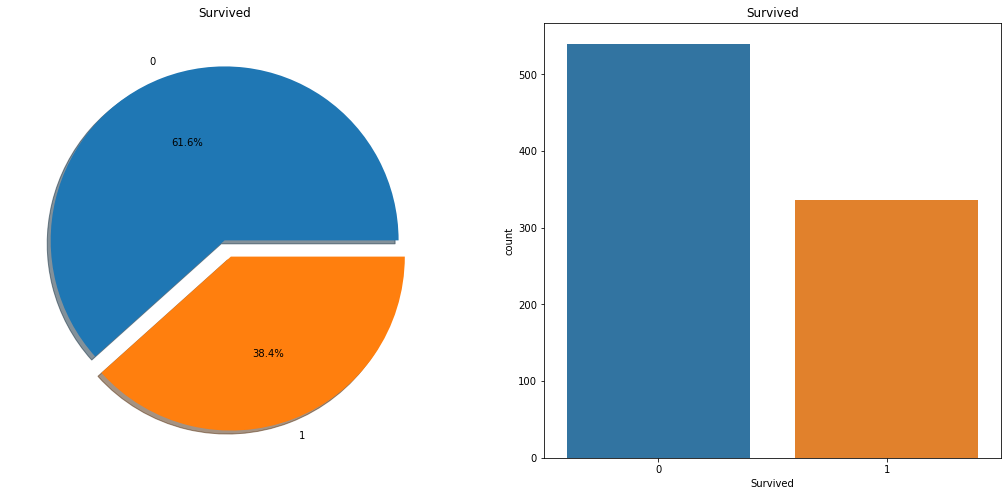

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
clean_data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=clean_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [11]:
X=clean_data.drop("Survived",axis=1)
y=clean_data["Survived"]

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=1)

# Categorical Feature Encoding(target and label)

In [13]:
encoding_categorical=Encoding(X_train,X_test,y_train,y_test,"label",["Sex","Embarked"])

In [14]:
X_train,X_test=encoding_categorical.encoder()

In [15]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
849,1,0,NaN,1,0,17453,89.1042,C92,0
438,1,1,64.0,1,4,19950,263.0000,C23 C25 C27,2
61,1,0,38.0,0,0,113572,80.0000,B28,3
437,2,0,24.0,2,3,29106,18.7500,NaN,2
569,3,1,32.0,0,0,350417,7.8542,NaN,2
...,...,...,...,...,...,...,...,...,...
726,2,0,30.0,3,0,31027,21.0000,NaN,2
778,3,1,NaN,0,0,36865,7.7375,NaN,1
72,2,1,21.0,0,0,S.O.C. 14879,73.5000,NaN,2
236,2,1,44.0,1,0,26707,26.0000,NaN,2


In [16]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
529,2,1,23.0,2,1,29104,11.500,NaN,2
744,3,1,31.0,0,0,STON/O 2. 3101288,7.925,NaN,2
180,3,0,NaN,8,2,CA. 2343,69.550,NaN,2
185,1,1,NaN,0,0,113767,50.000,A32,2
439,2,1,31.0,0,0,C.A. 18723,10.500,NaN,2
...,...,...,...,...,...,...,...,...,...
560,3,1,NaN,0,0,372622,7.750,NaN,1
516,2,0,34.0,0,0,C.A. 34260,10.500,F33,2
486,1,0,35.0,1,0,19943,90.000,C93,2
619,2,1,26.0,0,0,31028,10.500,NaN,2


In [17]:
encoding_categorical=Encoding(X_train,X_test,y_train,y_test,"target",["Ticket"])

In [18]:
X_train,X_test=encoding_categorical.encoder()

C:\Users\GameMax\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\GameMax\anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [19]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
849,1,0,NaN,1,0,0.832488,89.1042,C92,0
438,1,1,64.0,1,4,0.338556,263.0000,C23 C25 C27,2
61,1,0,38.0,0,0,0.832488,80.0000,B28,3
437,2,0,24.0,2,3,0.925754,18.7500,NaN,2
569,3,1,32.0,0,0,0.377143,7.8542,NaN,2
...,...,...,...,...,...,...,...,...,...
726,2,0,30.0,3,0,0.466959,21.0000,NaN,2
778,3,1,NaN,0,0,0.377143,7.7375,NaN,1
72,2,1,21.0,0,0,0.017886,73.5000,NaN,2
236,2,1,44.0,1,0,0.377143,26.0000,NaN,2


In [20]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
529,2,1,23.0,2,1,0.377143,11.500,NaN,2
744,3,1,31.0,0,0,0.377143,7.925,NaN,2
180,3,0,NaN,8,2,0.377143,69.550,NaN,2
185,1,1,NaN,0,0,0.377143,50.000,A32,2
439,2,1,31.0,0,0,0.377143,10.500,NaN,2
...,...,...,...,...,...,...,...,...,...
560,3,1,NaN,0,0,0.377143,7.750,NaN,1
516,2,0,34.0,0,0,0.377143,10.500,F33,2
486,1,0,35.0,1,0,0.377143,90.000,C93,2
619,2,1,26.0,0,0,0.377143,10.500,NaN,2


In [21]:
X_train.Cabin.isnull().sum()

543

In [22]:
target=TargetEncoder()

C:\Users\GameMax\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\GameMax\anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [23]:
a=X_train["Cabin"].notna()
X_train[a]

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
849,1,0,NaN,1,0,0.832488,89.1042,C92,0
438,1,1,64.0,1,4,0.338556,263.0000,C23 C25 C27,2
61,1,0,38.0,0,0,0.832488,80.0000,B28,3
659,1,1,58.0,0,2,0.632155,113.2750,D48,0
711,1,1,NaN,0,0,0.377143,26.5500,C124,2
...,...,...,...,...,...,...,...,...,...
435,1,0,14.0,1,2,0.925754,120.0000,B96 B98,2
662,1,1,47.0,0,0,0.377143,25.5875,E58,2
540,1,0,36.0,0,2,0.466959,71.0000,B22,2
496,1,0,54.0,1,0,0.377143,78.2667,D20,0


In [24]:
b=X_test["Cabin"].notna()
X_test[b]

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
185,1,1,NaN,0,0,0.377143,50.0000,A32,2
737,1,1,35.0,0,0,0.377143,512.3292,B101,0
3,1,0,35.0,1,0,0.377143,53.1000,C123,2
751,3,1,6.0,0,1,0.377143,12.4750,E121,2
724,1,1,27.0,1,0,0.377143,53.1000,E8,2
351,1,1,NaN,0,0,0.377143,35.0000,C128,2
319,1,0,40.0,1,1,0.377143,134.5000,E34,0
871,1,0,47.0,1,1,0.377143,52.5542,D35,2
390,1,1,36.0,1,2,0.925754,120.0000,B96 B98,2
512,1,1,36.0,0,0,0.377143,26.2875,E25,2


In [25]:
X_train[a]=target.fit_transform(X_train[a],y_train[a])
X_test[b]=target.transform(X_test[b],y_test[b])

# Replacing Missing Values

In [26]:
imputer_nan=imputer(X_train,X_test)

In [27]:
X_train,X_test=imputer_nan.run()

In [28]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
X_train.columns=X.columns
X_test.columns=X.columns

In [29]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,31.8,1.0,0.0,0.832488,89.1042,0.904072,0.0
1,1.0,1.0,64.0,1.0,4.0,0.338556,263.0000,0.370284,2.0
2,1.0,0.0,38.0,0.0,0.0,0.832488,80.0000,0.904072,3.0
3,2.0,0.0,24.0,2.0,3.0,0.925754,18.7500,0.720313,2.0
4,3.0,1.0,32.0,0.0,0.0,0.377143,7.8542,0.710041,2.0
...,...,...,...,...,...,...,...,...,...
695,2.0,0.0,30.0,3.0,0.0,0.466959,21.0000,0.601404,2.0
696,3.0,1.0,29.5,0.0,0.0,0.377143,7.7375,0.427889,1.0
697,2.0,1.0,21.0,0.0,0.0,0.017886,73.5000,0.528298,2.0
698,2.0,1.0,44.0,1.0,0.0,0.377143,26.0000,0.507345,2.0


# Deleting values with a correlation greater than 85%

In [30]:
corr=Remove_Correlated(X_train,X_test)

In [31]:
X_train,X_test=corr.remove()

In [32]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,31.8,1.0,0.0,0.832488,89.1042,0.904072,0.0
1,1.0,1.0,64.0,1.0,4.0,0.338556,263.0000,0.370284,2.0
2,1.0,0.0,38.0,0.0,0.0,0.832488,80.0000,0.904072,3.0
3,2.0,0.0,24.0,2.0,3.0,0.925754,18.7500,0.720313,2.0
4,3.0,1.0,32.0,0.0,0.0,0.377143,7.8542,0.710041,2.0
...,...,...,...,...,...,...,...,...,...
695,2.0,0.0,30.0,3.0,0.0,0.466959,21.0000,0.601404,2.0
696,3.0,1.0,29.5,0.0,0.0,0.377143,7.7375,0.427889,1.0
697,2.0,1.0,21.0,0.0,0.0,0.017886,73.5000,0.528298,2.0
698,2.0,1.0,44.0,1.0,0.0,0.377143,26.0000,0.507345,2.0


# Bringing the normal distribution by scaling the data (StandarScaler and MinMaxScaler)

In [33]:
scaler_df=Scaler(X_train,X_test,"standard")

In [34]:
X_train_scale,X_test_scale=scaler_df.scale()

# Converting imbalanced dataset to balanced data set(undersampling and oversampling)

In [35]:
imb_undersamp=imbalanceHandling(X_train_scale,y_train,"undersampling")

In [36]:
X_vs_y=imb_undersamp.run()

In [37]:
X_vs_y

{'AllKNN(n_jobs=-1)': [array([[ 0.81750747,  0.74535599,  0.97220174, ..., -0.54210764,
           0.65587124,  0.57942877],
         [ 0.81750747,  0.74535599, -0.16289158, ..., -0.51284093,
          -1.68602602, -0.68807167],
         [-1.58692627,  0.74535599,  1.66505091, ..., -0.08371065,
          -3.6148839 ,  0.57942877],
         ...,
         [ 0.81750747, -1.34164079, -0.59776499, ..., -0.50951356,
          -1.68602602, -0.68807167],
         [ 0.81750747, -1.34164079, -0.05970128, ..., -0.3415122 ,
           0.48203632, -1.95557211],
         [-0.3847094 , -1.34164079,  0.01400608, ..., -0.21028295,
          -0.37289691,  0.57942877]]),
  0      0
  1      0
  2      0
  3      0
  4      0
        ..
  504    1
  505    1
  506    1
  507    1
  508    1
  Name: Survived, Length: 509, dtype: int64],
 'RandomUnderSampler()': [array([[ 0.81750747,  0.74535599, -0.39138439, ..., -0.50561833,
           0.57813513,  0.57942877],
         [ 0.81750747,  0.74535599, -0.35453

In [38]:
imb_oversamp=imbalanceHandling(X_train_scale,y_train,"oversampling")

In [39]:
oversamp_method=imb_oversamp.run()

In [40]:
oversamp_method

{'RandomOverSampler()': [array([[-1.58692627, -1.34164079,  0.14667933, ...,  1.3428892 ,
           1.91763738, -1.95557211],
         [-1.58692627,  0.74535599,  2.52005627, ...,  5.30872557,
          -2.12197632,  0.57942877],
         [-1.58692627, -1.34164079,  0.60366495, ...,  1.13526045,
           1.91763738,  1.84692922],
         ...,
         [-0.3847094 , -1.34164079,  0.01400608, ..., -0.4075533 ,
           1.08333785, -0.68807167],
         [ 0.81750747,  0.74535599, -0.28082335, ..., -0.26074083,
           0.52698249, -1.95557211],
         [-1.58692627,  0.74535599,  0.52995759, ...,  0.50933646,
          -0.05574601,  0.57942877]]),
  0      1
  1      0
  2      1
  3      1
  4      1
        ..
  867    1
  868    1
  869    1
  870    1
  871    1
  Name: Survived, Length: 872, dtype: int64],
 'RandomOverSampler(shrinkage=5)': [array([[-1.58692627, -1.34164079,  0.14667933, ...,  1.3428892 ,
           1.91763738, -1.95557211],
         [-1.58692627,  0.745355

# Choosing the right Imbalance model

In [41]:
model_selec=Modeling(X_test_scale,y_test,RandomForestClassifier(class_weight="balanced"),X_vs_y)

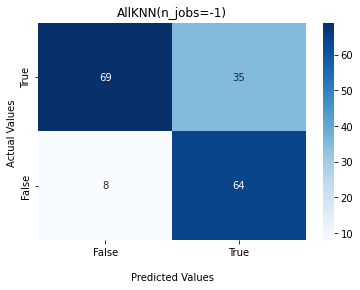

None


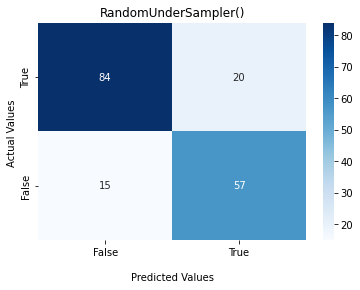

None


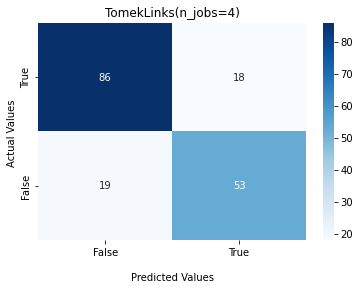

None


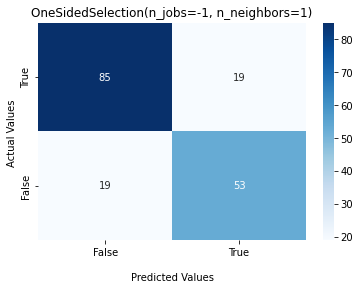

None


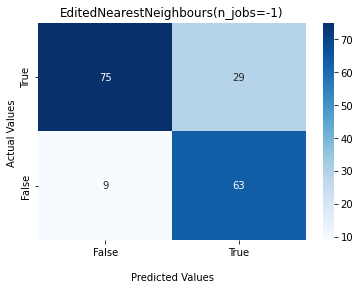

None


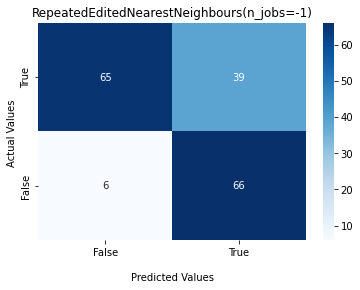

None


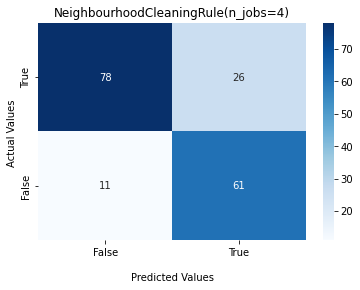

None


In [42]:
Model_data=model_selec.run()

In [43]:
Model_data

,Method_name,Test_score,Train_score,f1_score_test,balanced_accuracy_test,recall_test,precision_test,pred_matthew_score_test,pred_matthew_score_train,self.balanced_accuracy_train
0,AllKNN(n_jobs=-1),0.755682,92.292308,0.748538,0.776175,0.888889,0.646465,0.547438,0.996074,0.998106
1,RandomUnderSampler(),0.801136,80.655271,0.765101,0.799679,0.791667,0.740260,0.594028,0.981124,0.990530
2,TomekLinks(n_jobs=4),0.789773,88.181818,0.741259,0.781517,0.736111,0.746479,0.564279,0.974958,0.986161
3,"OneSidedSelection(n_jobs=-1, n_neighbors=1)",0.784091,88.712121,0.736111,0.776709,0.736111,0.736111,0.553419,0.974835,0.986780
4,EditedNearestNeighbours(n_jobs=-1),0.784091,92.200855,0.768293,0.798077,0.875000,0.684783,0.586824,0.985150,0.992493
5,RepeatedEditedNearestNeighbours(n_jobs=-1),0.744318,93.766667,0.745763,0.770833,0.916667,0.628571,0.542864,0.995969,0.998106
6,NeighbourhoodCleaningRule(n_jobs=4),0.789773,89.761905,0.767296,0.798611,0.847222,0.701149,0.587306,0.989110,0.994318


In [44]:
model_selec_over=Modeling(X_test_scale,y_test,RandomForestClassifier(class_weight="balanced"),oversamp_method)

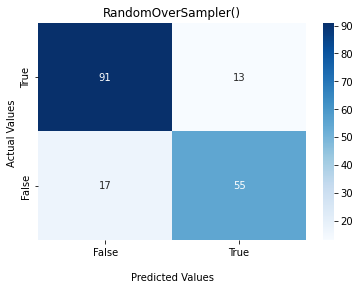

None


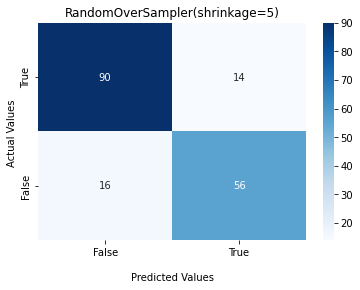

None


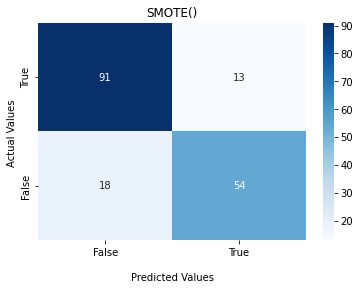

None


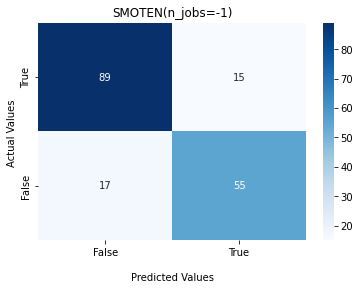

None


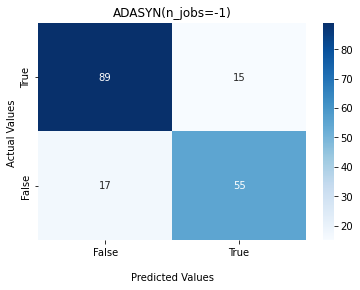

None


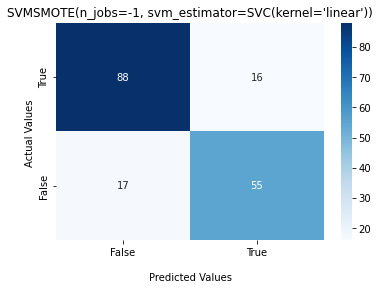

None


In [45]:
Model_oversampling=model_selec_over.run()

In [46]:
Model_oversampling

,Method_name,Test_score,Train_score,f1_score_test,balanced_accuracy_test,recall_test,precision_test,pred_matthew_score_test,pred_matthew_score_train,self.balanced_accuracy_train
0,RandomOverSampler(),0.829545,90.972516,0.785714,0.819444,0.763889,0.808824,0.645122,0.981651,0.990826
1,RandomOverSampler(shrinkage=5),0.829545,87.225159,0.788732,0.821581,0.777778,0.800000,0.646103,0.981693,0.990826
2,SMOTE(),0.823864,85.356765,0.776978,0.812500,0.750000,0.805970,0.632867,0.981693,0.990826
3,SMOTEN(n_jobs=-1),0.818182,86.971459,0.774648,0.809829,0.763889,0.785714,0.622491,0.981693,0.990826
4,ADASYN(n_jobs=-1),0.818182,84.656700,0.774648,0.809829,0.763889,0.785714,0.622491,0.980957,0.990387
5,"SVMSMOTE(n_jobs=-1, svm_estimator=SVC(kernel='...",0.812500,85.909091,0.769231,0.805021,0.763889,0.774648,0.611391,0.981693,0.990826


In [47]:
svm=SVMSMOTE(sampling_strategy="auto",
                         
                          k_neighbors=5,
                          m_neighbors=10,
                          n_jobs=-1,
                          svm_estimator=SVC(kernel="linear"))

In [48]:
X_train_svm,y_train_svm=svm.fit_resample(X_train_scale,y_train)

In [49]:
sm=SMOTE(sampling_strategy="auto",

                        k_neighbors=5,
                        )

In [50]:
X_train_sm,y_train_sm=sm.fit_resample(X_train_scale,y_train)

In [51]:
ada=ADASYN(sampling_strategy="auto",
                      
                      n_neighbors=5,
                      n_jobs=-1,
                      )

In [52]:
X_train_ada,y_train_ada=ada.fit_resample(X_train_scale,y_train)

In [53]:
one=OneSidedSelection(
        sampling_strategy='auto',
        n_neighbors=1,
        n_jobs=-1,)

In [54]:
X_train_one,y_train_one=one.fit_resample(X_train_scale,y_train)

In [55]:
tm=TomekLinks(
            sampling_strategy='auto',
            n_jobs=4,
        )

In [56]:
X_train_tm,y_train_tm=tm.fit_resample(X_train_scale,y_train)

In [57]:
neg=NeighbourhoodCleaningRule(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4,
        threshold_cleaning=0.5,
        )

In [58]:
X_train_neg,y_train_neg=neg.fit_resample(X_train_scale,y_train)

# Increasing the model's score using Hyperparameter optimization
# Optuna, HalvingRandomSearch, HalvingGridsearch 

In [59]:
hyp_svm=Hyperparameter(X_train_svm,X_test_scale,y_train_svm,y_test)

In [60]:
Dataframe_svm=hyp_svm.run()
Dataframe_svm

[I 2022-08-24 20:56:32,110] A new study created in memory with name: no-name-6fe5e2bf-5bd8-4829-a891-c7ba719b3371
[I 2022-08-24 20:56:32,111] A new study created in memory with name: no-name-6dd4665c-8f82-4e2c-8cff-f10230623bc2
[I 2022-08-24 20:56:32,112] A new study created in memory with name: no-name-0d5de2c9-b744-4341-ada8-44b705405101
[I 2022-08-24 20:56:33,052] Trial 0 finished with value: 0.5909090909090909 and parameters: {'max_depth': 40, 'n_estimators': 476, 'min_samples_leaf': 346, 'criterion': 'entropy', 'min_samples_split': 448, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5909090909090909.
[I 2022-08-24 20:56:34,227] Trial 1 finished with value: 0.5909090909090909 and parameters: {'max_depth': 358, 'n_estimators': 776, 'min_samples_leaf': 556, 'criterion': 'entropy', 'min_samples_split': 440, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5909090909090909.
[I 2022-08-24 20:56:35,017] Trial

[I 2022-08-24 20:56:54,872] Trial 25 finished with value: 0.5909090909090909 and parameters: {'max_depth': 76, 'n_estimators': 524, 'min_samples_leaf': 700, 'criterion': 'gini', 'min_samples_split': 43, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 19 with value: 0.7897727272727273.
[I 2022-08-24 20:56:55,935] Trial 26 finished with value: 0.7784090909090909 and parameters: {'max_depth': 325, 'n_estimators': 451, 'min_samples_leaf': 78, 'criterion': 'entropy', 'min_samples_split': 59, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 19 with value: 0.7897727272727273.
[I 2022-08-24 20:56:56,626] Trial 27 finished with value: 0.5909090909090909 and parameters: {'max_depth': 426, 'n_estimators': 486, 'min_samples_leaf': 338, 'criterion': 'gini', 'min_samples_split': 460, 'class_weight': 'balanced', 'max_features': None}. Best is trial 19 with value: 0.7897727272727273.
[I 2022-08-24 20:56:58,021] Trial 28 finished with value: 0.4090

[I 2022-08-24 20:57:19,385] Trial 51 finished with value: 0.5909090909090909 and parameters: {'max_depth': 166, 'n_estimators': 433, 'min_samples_leaf': 372, 'criterion': 'entropy', 'min_samples_split': 77, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 19 with value: 0.7897727272727273.
[I 2022-08-24 20:57:20,289] Trial 52 finished with value: 0.5909090909090909 and parameters: {'max_depth': 336, 'n_estimators': 637, 'min_samples_leaf': 389, 'criterion': 'entropy', 'min_samples_split': 395, 'class_weight': 'balanced', 'max_features': None}. Best is trial 19 with value: 0.7897727272727273.
[I 2022-08-24 20:57:20,805] Trial 53 finished with value: 0.7102272727272727 and parameters: {'max_depth': 338, 'n_estimators': 346, 'min_samples_leaf': 236, 'criterion': 'gini', 'min_samples_split': 143, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 19 with value: 0.7897727272727273.
[I 2022-08-24 20:57:21,252] Trial 54 finished with value: 0.7784090909090909

[I 2022-08-24 20:57:46,235] Trial 77 finished with value: 0.7784090909090909 and parameters: {'max_depth': 250, 'n_estimators': 430, 'min_samples_leaf': 9, 'criterion': 'entropy', 'min_samples_split': 338, 'class_weight': 'balanced', 'max_features': None}. Best is trial 19 with value: 0.7897727272727273.
[I 2022-08-24 20:57:47,590] Trial 78 finished with value: 0.5909090909090909 and parameters: {'max_depth': 136, 'n_estimators': 921, 'min_samples_leaf': 356, 'criterion': 'gini', 'min_samples_split': 434, 'class_weight': 'balanced', 'max_features': 'log2'}. Best is trial 19 with value: 0.7897727272727273.
[I 2022-08-24 20:57:48,282] Trial 79 finished with value: 0.5909090909090909 and parameters: {'max_depth': 331, 'n_estimators': 486, 'min_samples_leaf': 495, 'criterion': 'gini', 'min_samples_split': 186, 'class_weight': 'balanced', 'max_features': None}. Best is trial 19 with value: 0.7897727272727273.
[I 2022-08-24 20:57:49,270] Trial 80 finished with value: 0.7784090909090909 and p

[W 2022-08-24 20:58:08,798] The parameter 'class_weight' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:58:08,799] The parameter 'max_features' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:58:09,580] Trial 1 finished with value: 0.5909090909090909 and parameters: {'max_depth': 72, 'n_estimat

[W 2022-08-24 20:58:12,409] The parameter 'class_weight' in trial#6 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:58:12,410] The parameter 'max_features' in trial#6 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:58:13,487] Trial 6 finished with value: 0.5909090909090909 and parameters: {'max_depth': 228, 'n_estima

[W 2022-08-24 20:58:16,771] The parameter 'class_weight' in trial#11 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:58:16,772] The parameter 'max_features' in trial#11 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:58:17,424] Trial 11 finished with value: 0.5909090909090909 and parameters: {'max_depth': 127, 'n_est

[W 2022-08-24 20:58:20,410] The parameter 'class_weight' in trial#16 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:58:20,411] The parameter 'max_features' in trial#16 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:58:21,464] Trial 16 finished with value: 0.5909090909090909 and parameters: {'max_depth': 143, 'n_est

[W 2022-08-24 20:58:23,760] The parameter 'class_weight' in trial#21 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:58:23,761] The parameter 'max_features' in trial#21 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:58:24,383] Trial 21 finished with value: 0.5909090909090909 and parameters: {'max_depth': 118, 'n_est

[W 2022-08-24 20:58:27,492] The parameter 'class_weight' in trial#26 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:58:27,493] The parameter 'max_features' in trial#26 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:58:28,615] Trial 26 finished with value: 0.5909090909090909 and parameters: {'max_depth': 159, 'n_est

[W 2022-08-24 20:58:32,042] The parameter 'class_weight' in trial#31 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:58:32,043] The parameter 'max_features' in trial#31 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:58:32,962] Trial 31 finished with value: 0.7840909090909091 and parameters: {'max_depth': 322, 'n_est

[W 2022-08-24 20:58:36,509] The parameter 'class_weight' in trial#36 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:58:36,510] The parameter 'max_features' in trial#36 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:58:37,217] Trial 36 finished with value: 0.5909090909090909 and parameters: {'max_depth': 382, 'n_est

[W 2022-08-24 20:58:40,348] The parameter 'class_weight' in trial#41 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:58:40,349] The parameter 'max_features' in trial#41 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:58:41,414] Trial 41 finished with value: 0.7784090909090909 and parameters: {'max_depth': 190, 'n_est

[W 2022-08-24 20:58:44,159] The parameter 'class_weight' in trial#46 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:58:44,159] The parameter 'max_features' in trial#46 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:58:44,773] Trial 46 finished with value: 0.7784090909090909 and parameters: {'max_depth': 336, 'n_est

[W 2022-08-24 20:58:47,206] The parameter 'class_weight' in trial#51 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:58:47,206] The parameter 'max_features' in trial#51 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:58:47,760] Trial 51 finished with value: 0.5909090909090909 and parameters: {'max_depth': 434, 'n_est

[W 2022-08-24 20:58:50,064] The parameter 'class_weight' in trial#56 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:58:50,064] The parameter 'max_features' in trial#56 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:58:50,684] Trial 56 finished with value: 0.7784090909090909 and parameters: {'max_depth': 408, 'n_est

[W 2022-08-24 20:58:52,973] The parameter 'class_weight' in trial#61 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:58:52,974] The parameter 'max_features' in trial#61 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:58:54,152] Trial 61 finished with value: 0.7784090909090909 and parameters: {'max_depth': 175, 'n_est

[W 2022-08-24 20:58:55,970] The parameter 'class_weight' in trial#66 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:58:55,971] The parameter 'max_features' in trial#66 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:58:56,331] Trial 66 finished with value: 0.7840909090909091 and parameters: {'max_depth': 411, 'n_est

[W 2022-08-24 20:58:59,354] The parameter 'class_weight' in trial#71 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:58:59,355] The parameter 'max_features' in trial#71 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:58:59,679] Trial 71 finished with value: 0.7897727272727273 and parameters: {'max_depth': 92, 'n_esti

[W 2022-08-24 20:59:01,850] The parameter 'class_weight' in trial#76 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:59:01,851] The parameter 'max_features' in trial#76 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:59:02,190] Trial 76 finished with value: 0.7840909090909091 and parameters: {'max_depth': 383, 'n_est

[W 2022-08-24 20:59:03,757] The parameter 'class_weight' in trial#81 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:59:03,758] The parameter 'max_features' in trial#81 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:59:04,437] Trial 81 finished with value: 0.7727272727272727 and parameters: {'max_depth': 413, 'n_est

[W 2022-08-24 20:59:06,993] The parameter 'class_weight' in trial#86 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:59:06,993] The parameter 'max_features' in trial#86 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:59:07,641] Trial 86 finished with value: 0.7897727272727273 and parameters: {'max_depth': 107, 'n_est

[W 2022-08-24 20:59:11,070] The parameter 'class_weight' in trial#91 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:59:11,071] The parameter 'max_features' in trial#91 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:59:11,615] Trial 91 finished with value: 0.7840909090909091 and parameters: {'max_depth': 429, 'n_est

[W 2022-08-24 20:59:15,241] The parameter 'class_weight' in trial#96 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 20:59:15,242] The parameter 'max_features' in trial#96 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 20:59:15,725] Trial 96 finished with value: 0.7727272727272727 and parameters: {'max_depth': 222, 'n_est

[I 2022-08-24 20:59:23,709] Trial 7 finished with value: 0.6363636363636364 and parameters: {'max_depth': 438, 'n_estimators': 395, 'min_samples_leaf': 266, 'criterion': 'gini', 'min_samples_split': 470, 'class_weight': 'balanced', 'max_features': None}. Best is trial 0 with value: 0.7784090909090909.
[I 2022-08-24 20:59:24,581] Trial 8 finished with value: 0.5909090909090909 and parameters: {'max_depth': 137, 'n_estimators': 592, 'min_samples_leaf': 703, 'criterion': 'gini', 'min_samples_split': 282, 'class_weight': 'balanced', 'max_features': None}. Best is trial 0 with value: 0.7784090909090909.
[I 2022-08-24 20:59:25,335] Trial 9 finished with value: 0.5909090909090909 and parameters: {'max_depth': 307, 'n_estimators': 488, 'min_samples_leaf': 560, 'criterion': 'entropy', 'min_samples_split': 87, 'class_weight': 'balanced', 'max_features': 'log2'}. Best is trial 0 with value: 0.7784090909090909.
[I 2022-08-24 20:59:27,434] Trial 10 finished with value: 0.7784090909090909 and parame

[I 2022-08-24 21:00:00,089] Trial 32 finished with value: 0.7784090909090909 and parameters: {'max_depth': 3, 'n_estimators': 433, 'min_samples_leaf': 194, 'criterion': 'gini', 'min_samples_split': 406, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 11 with value: 0.7840909090909091.
[I 2022-08-24 21:00:01,440] Trial 33 finished with value: 0.7784090909090909 and parameters: {'max_depth': 354, 'n_estimators': 629, 'min_samples_leaf': 153, 'criterion': 'gini', 'min_samples_split': 470, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 11 with value: 0.7840909090909091.
[I 2022-08-24 21:00:02,548] Trial 34 finished with value: 0.7784090909090909 and parameters: {'max_depth': 127, 'n_estimators': 576, 'min_samples_leaf': 67, 'criterion': 'entropy', 'min_samples_split': 494, 'class_weight': 'balanced', 'max_features': None}. Best is trial 11 with value: 0.7840909090909091.
[I 2022-08-24 21:00:03,605] Trial 35 finished with value: 0.77840

[I 2022-08-24 21:00:29,010] Trial 58 finished with value: 0.5909090909090909 and parameters: {'max_depth': 111, 'n_estimators': 104, 'min_samples_leaf': 470, 'criterion': 'gini', 'min_samples_split': 367, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 11 with value: 0.7840909090909091.
[I 2022-08-24 21:00:30,061] Trial 59 finished with value: 0.7784090909090909 and parameters: {'max_depth': 64, 'n_estimators': 458, 'min_samples_leaf': 102, 'criterion': 'gini', 'min_samples_split': 410, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 11 with value: 0.7840909090909091.
[I 2022-08-24 21:00:31,622] Trial 60 finished with value: 0.6363636363636364 and parameters: {'max_depth': 313, 'n_estimators': 628, 'min_samples_leaf': 250, 'criterion': 'gini', 'min_samples_split': 482, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 11 with value: 0.7840909090909091.
[I 2022-08-24 21:00:32,678] Trial 61 finished with value

[I 2022-08-24 21:00:57,232] Trial 84 finished with value: 0.7784090909090909 and parameters: {'max_depth': 60, 'n_estimators': 237, 'min_samples_leaf': 126, 'criterion': 'gini', 'min_samples_split': 411, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 11 with value: 0.7840909090909091.
[I 2022-08-24 21:00:57,956] Trial 85 finished with value: 0.7784090909090909 and parameters: {'max_depth': 15, 'n_estimators': 327, 'min_samples_leaf': 147, 'criterion': 'gini', 'min_samples_split': 405, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 11 with value: 0.7840909090909091.
[I 2022-08-24 21:00:58,915] Trial 86 finished with value: 0.7784090909090909 and parameters: {'max_depth': 51, 'n_estimators': 449, 'min_samples_leaf': 217, 'criterion': 'gini', 'min_samples_split': 380, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 11 with value: 0.7840909090909091.
[I 2022-08-24 21:00:59,736] Trial 87 finished with value: 

,Value
Halving_random_best_params,"{'n_estimators': 1000, 'min_samples_split': 10..."
Halving_random_best_score,0.840909
random_study_best_params,"{'max_depth': 190, 'n_estimators': 395, 'min_s..."
random_study_best_value,0.789773
cmaes_study_best_params,"{'max_depth': 429, 'n_estimators': 393, 'min_s..."
cmaes_study_best_value,0.8125
tpe_study_best_params,"{'max_depth': 223, 'n_estimators': 785, 'min_s..."
tpe_study_best_value,0.784091
Halving_grid_best_params,"{'class_weight': 'balanced_subsample', 'criter..."
Halving_Grid_best_score,0.818182


In [96]:
Feature_values_svm=Dataframe_svm["Value"].tolist()
Feature_values_svm

[{'n_estimators': 1000,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_features': None,
  'max_depth': 15,
  'criterion': 'entropy',
  'class_weight': 'balanced'},
 0.8409090909090909,
 {'max_depth': 190,
  'n_estimators': 395,
  'min_samples_leaf': 26,
  'criterion': 'entropy',
  'min_samples_split': 152,
  'class_weight': 'balanced_subsample',
  'max_features': 'log2'},
 0.7897727272727273,
 {'max_depth': 429,
  'n_estimators': 393,
  'min_samples_leaf': 12,
  'criterion': 'gini',
  'min_samples_split': 108,
  'class_weight': 'balanced_subsample',
  'max_features': None},
 0.8125,
 {'max_depth': 223,
  'n_estimators': 785,
  'min_samples_leaf': 36,
  'criterion': 'entropy',
  'min_samples_split': 489,
  'class_weight': 'balanced_subsample',
  'max_features': 'log2'},
 0.7840909090909091,
 {'class_weight': 'balanced_subsample',
  'criterion': 'gini',
  'max_depth': 50,
  'max_features': 'log2',
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 50},
 0.81

In [114]:
model_svm=RandomForestClassifier(n_estimators=1000,
  min_samples_split=10,
  min_samples_leaf=2,
  max_features=None,
  max_depth=15,
  criterion='entropy',
  class_weight='balanced')

In [104]:
model_svm.fit(X_train_svm,y_train_svm)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features=None, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=1000)

In [105]:
y_pred_svm=model_svm.predict(X_test_scale)

In [106]:
model_svm.score(X_test_scale,y_test)

0.8352272727272727

In [107]:
model_svm.score(X_train_svm,y_train_svm)

0.9392201834862385

In [128]:
cf_matrix_svm =confusion_matrix(y_test,y_pred_svm)

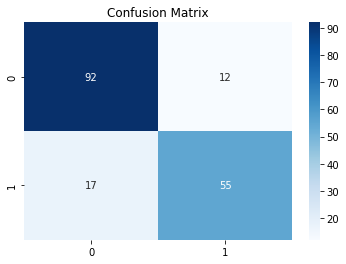

In [129]:
con = sns.heatmap(cf_matrix_svm, annot=True, cmap='Blues')
con.set_title('Confusion Matrix');
plt.show()

In [111]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       104
           1       0.82      0.76      0.79        72

    accuracy                           0.84       176
   macro avg       0.83      0.82      0.83       176
weighted avg       0.83      0.84      0.83       176



In [61]:
hyp_sm=Hyperparameter(X_train_sm,X_test_scale,y_train_sm,y_test)

In [62]:
Dataframe_sm=hyp_sm.run()
Dataframe_sm

[I 2022-08-24 21:03:38,543] A new study created in memory with name: no-name-d88dab2c-dae7-4296-b37b-60e6893ae8ab
[I 2022-08-24 21:03:38,544] A new study created in memory with name: no-name-9ba3aafe-660a-4569-b997-13d1240bbfad
[I 2022-08-24 21:03:38,545] A new study created in memory with name: no-name-01e9f211-6243-4c70-95af-486c80514972
[I 2022-08-24 21:03:39,275] Trial 0 finished with value: 0.5909090909090909 and parameters: {'max_depth': 184, 'n_estimators': 504, 'min_samples_leaf': 737, 'criterion': 'gini', 'min_samples_split': 324, 'class_weight': 'balanced', 'max_features': 'log2'}. Best is trial 0 with value: 0.5909090909090909.
[I 2022-08-24 21:03:39,791] Trial 1 finished with value: 0.5909090909090909 and parameters: {'max_depth': 118, 'n_estimators': 262, 'min_samples_leaf': 308, 'criterion': 'entropy', 'min_samples_split': 180, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 0 with value: 0.5909090909090909.
[I 2022-08-24 21:03:40,976] Trial 2 f

[I 2022-08-24 21:04:04,139] Trial 25 finished with value: 0.5909090909090909 and parameters: {'max_depth': 427, 'n_estimators': 263, 'min_samples_leaf': 956, 'criterion': 'gini', 'min_samples_split': 177, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 21 with value: 0.7840909090909091.
[I 2022-08-24 21:04:05,593] Trial 26 finished with value: 0.6306818181818182 and parameters: {'max_depth': 257, 'n_estimators': 748, 'min_samples_leaf': 280, 'criterion': 'gini', 'min_samples_split': 332, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 21 with value: 0.7840909090909091.
[I 2022-08-24 21:04:07,019] Trial 27 finished with value: 0.5909090909090909 and parameters: {'max_depth': 44, 'n_estimators': 744, 'min_samples_leaf': 519, 'criterion': 'entropy', 'min_samples_split': 417, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 21 with value: 0.7840909090909091.
[I 2022-08-24 21:04:07,985] Trial 28 finished wit

[I 2022-08-24 21:04:26,891] Trial 51 finished with value: 0.5909090909090909 and parameters: {'max_depth': 21, 'n_estimators': 328, 'min_samples_leaf': 863, 'criterion': 'gini', 'min_samples_split': 127, 'class_weight': 'balanced', 'max_features': 'log2'}. Best is trial 39 with value: 0.8068181818181818.
[I 2022-08-24 21:04:27,271] Trial 52 finished with value: 0.5909090909090909 and parameters: {'max_depth': 403, 'n_estimators': 195, 'min_samples_leaf': 311, 'criterion': 'entropy', 'min_samples_split': 17, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 39 with value: 0.8068181818181818.
[I 2022-08-24 21:04:27,596] Trial 53 finished with value: 0.5909090909090909 and parameters: {'max_depth': 46, 'n_estimators': 222, 'min_samples_leaf': 839, 'criterion': 'gini', 'min_samples_split': 231, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 39 with value: 0.8068181818181818.
[I 2022-08-24 21:04:28,900] Trial 54 finished with value: 0.59090909090

[I 2022-08-24 21:04:52,526] Trial 77 finished with value: 0.5909090909090909 and parameters: {'max_depth': 390, 'n_estimators': 984, 'min_samples_leaf': 591, 'criterion': 'gini', 'min_samples_split': 427, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 39 with value: 0.8068181818181818.
[I 2022-08-24 21:04:53,668] Trial 78 finished with value: 0.7784090909090909 and parameters: {'max_depth': 424, 'n_estimators': 537, 'min_samples_leaf': 235, 'criterion': 'gini', 'min_samples_split': 121, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 39 with value: 0.8068181818181818.
[I 2022-08-24 21:04:55,293] Trial 79 finished with value: 0.5909090909090909 and parameters: {'max_depth': 307, 'n_estimators': 821, 'min_samples_leaf': 361, 'criterion': 'entropy', 'min_samples_split': 452, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 39 with value: 0.8068181818181818.
[I 2022-08-24 21:04:56,759] Trial 80 finished with value: 

[W 2022-08-24 21:05:13,237] The parameter 'class_weight' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:05:13,238] The parameter 'max_features' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:05:14,486] Trial 1 finished with value: 0.5909090909090909 and parameters: {'max_depth': 455, 'n_estima

[W 2022-08-24 21:05:18,648] The parameter 'class_weight' in trial#6 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:05:18,649] The parameter 'max_features' in trial#6 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:05:19,712] Trial 6 finished with value: 0.5909090909090909 and parameters: {'max_depth': 155, 'n_estima

[W 2022-08-24 21:05:23,043] The parameter 'class_weight' in trial#11 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:05:23,043] The parameter 'max_features' in trial#11 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:05:24,217] Trial 11 finished with value: 0.5909090909090909 and parameters: {'max_depth': 163, 'n_est

[W 2022-08-24 21:05:28,748] The parameter 'class_weight' in trial#16 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:05:28,749] The parameter 'max_features' in trial#16 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:05:29,831] Trial 16 finished with value: 0.5909090909090909 and parameters: {'max_depth': 314, 'n_est

[W 2022-08-24 21:05:33,246] The parameter 'class_weight' in trial#21 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:05:33,247] The parameter 'max_features' in trial#21 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:05:34,123] Trial 21 finished with value: 0.5909090909090909 and parameters: {'max_depth': 308, 'n_est

[W 2022-08-24 21:05:37,699] The parameter 'class_weight' in trial#26 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:05:37,701] The parameter 'max_features' in trial#26 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:05:38,976] Trial 26 finished with value: 0.5909090909090909 and parameters: {'max_depth': 241, 'n_est

[W 2022-08-24 21:05:42,826] The parameter 'class_weight' in trial#31 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:05:42,826] The parameter 'max_features' in trial#31 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:05:43,666] Trial 31 finished with value: 0.5909090909090909 and parameters: {'max_depth': 262, 'n_est

[W 2022-08-24 21:05:46,939] The parameter 'class_weight' in trial#36 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:05:46,940] The parameter 'max_features' in trial#36 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:05:47,886] Trial 36 finished with value: 0.5909090909090909 and parameters: {'max_depth': 230, 'n_est

[W 2022-08-24 21:05:51,465] The parameter 'class_weight' in trial#41 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:05:51,465] The parameter 'max_features' in trial#41 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:05:52,103] Trial 41 finished with value: 0.5909090909090909 and parameters: {'max_depth': 291, 'n_est

[W 2022-08-24 21:05:55,617] The parameter 'class_weight' in trial#46 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:05:55,618] The parameter 'max_features' in trial#46 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:05:56,257] Trial 46 finished with value: 0.5909090909090909 and parameters: {'max_depth': 379, 'n_est

[W 2022-08-24 21:05:59,387] The parameter 'class_weight' in trial#51 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:05:59,388] The parameter 'max_features' in trial#51 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:06:00,123] Trial 51 finished with value: 0.5909090909090909 and parameters: {'max_depth': 284, 'n_est

[W 2022-08-24 21:06:02,781] The parameter 'class_weight' in trial#56 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:06:02,782] The parameter 'max_features' in trial#56 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:06:03,661] Trial 56 finished with value: 0.5909090909090909 and parameters: {'max_depth': 330, 'n_est

[W 2022-08-24 21:06:07,015] The parameter 'class_weight' in trial#61 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:06:07,016] The parameter 'max_features' in trial#61 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:06:07,635] Trial 61 finished with value: 0.5909090909090909 and parameters: {'max_depth': 250, 'n_est

[W 2022-08-24 21:06:10,650] The parameter 'class_weight' in trial#66 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:06:10,651] The parameter 'max_features' in trial#66 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:06:11,521] Trial 66 finished with value: 0.5909090909090909 and parameters: {'max_depth': 215, 'n_est

[W 2022-08-24 21:06:14,365] The parameter 'class_weight' in trial#71 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:06:14,366] The parameter 'max_features' in trial#71 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:06:15,054] Trial 71 finished with value: 0.5909090909090909 and parameters: {'max_depth': 166, 'n_est

[W 2022-08-24 21:06:17,582] The parameter 'class_weight' in trial#76 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:06:17,583] The parameter 'max_features' in trial#76 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:06:18,077] Trial 76 finished with value: 0.5909090909090909 and parameters: {'max_depth': 150, 'n_est

[W 2022-08-24 21:06:20,448] The parameter 'class_weight' in trial#81 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:06:20,449] The parameter 'max_features' in trial#81 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:06:21,096] Trial 81 finished with value: 0.5909090909090909 and parameters: {'max_depth': 193, 'n_est

[W 2022-08-24 21:06:23,260] The parameter 'class_weight' in trial#86 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:06:23,261] The parameter 'max_features' in trial#86 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:06:23,835] Trial 86 finished with value: 0.5909090909090909 and parameters: {'max_depth': 94, 'n_esti

[W 2022-08-24 21:06:26,018] The parameter 'class_weight' in trial#91 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:06:26,019] The parameter 'max_features' in trial#91 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:06:26,511] Trial 91 finished with value: 0.5909090909090909 and parameters: {'max_depth': 93, 'n_esti

[W 2022-08-24 21:06:29,013] The parameter 'class_weight' in trial#96 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:06:29,014] The parameter 'max_features' in trial#96 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:06:29,452] Trial 96 finished with value: 0.5909090909090909 and parameters: {'max_depth': 200, 'n_est

[I 2022-08-24 21:06:39,286] Trial 6 finished with value: 0.5909090909090909 and parameters: {'max_depth': 103, 'n_estimators': 413, 'min_samples_leaf': 907, 'criterion': 'gini', 'min_samples_split': 18, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 3 with value: 0.7784090909090909.
[I 2022-08-24 21:06:39,794] Trial 7 finished with value: 0.5909090909090909 and parameters: {'max_depth': 191, 'n_estimators': 265, 'min_samples_leaf': 413, 'criterion': 'gini', 'min_samples_split': 180, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 3 with value: 0.7784090909090909.
[I 2022-08-24 21:06:41,009] Trial 8 finished with value: 0.4090909090909091 and parameters: {'max_depth': 127, 'n_estimators': 843, 'min_samples_leaf': 575, 'criterion': 'gini', 'min_samples_split': 281, 'class_weight': 'balanced', 'max_features': 'log2'}. Best is trial 3 with value: 0.7784090909090909.
[I 2022-08-24 21:06:41,730] Trial 9 finished with value: 0.590909090

[I 2022-08-24 21:07:02,529] Trial 32 finished with value: 0.7784090909090909 and parameters: {'max_depth': 413, 'n_estimators': 184, 'min_samples_leaf': 162, 'criterion': 'entropy', 'min_samples_split': 382, 'class_weight': 'balanced', 'max_features': None}. Best is trial 10 with value: 0.7840909090909091.
[I 2022-08-24 21:07:03,722] Trial 33 finished with value: 0.7784090909090909 and parameters: {'max_depth': 421, 'n_estimators': 684, 'min_samples_leaf': 141, 'criterion': 'entropy', 'min_samples_split': 275, 'class_weight': 'balanced', 'max_features': None}. Best is trial 10 with value: 0.7840909090909091.
[I 2022-08-24 21:07:05,372] Trial 34 finished with value: 0.7784090909090909 and parameters: {'max_depth': 418, 'n_estimators': 928, 'min_samples_leaf': 67, 'criterion': 'entropy', 'min_samples_split': 270, 'class_weight': 'balanced', 'max_features': None}. Best is trial 10 with value: 0.7840909090909091.
[I 2022-08-24 21:07:06,396] Trial 35 finished with value: 0.7784090909090909 

[I 2022-08-24 21:07:30,998] Trial 58 finished with value: 0.7784090909090909 and parameters: {'max_depth': 45, 'n_estimators': 800, 'min_samples_leaf': 31, 'criterion': 'gini', 'min_samples_split': 357, 'class_weight': 'balanced', 'max_features': None}. Best is trial 10 with value: 0.7840909090909091.
[I 2022-08-24 21:07:31,282] Trial 59 finished with value: 0.6647727272727273 and parameters: {'max_depth': 448, 'n_estimators': 168, 'min_samples_leaf': 248, 'criterion': 'entropy', 'min_samples_split': 420, 'class_weight': 'balanced', 'max_features': None}. Best is trial 10 with value: 0.7840909090909091.
[I 2022-08-24 21:07:31,978] Trial 60 finished with value: 0.7784090909090909 and parameters: {'max_depth': 76, 'n_estimators': 414, 'min_samples_leaf': 109, 'criterion': 'gini', 'min_samples_split': 309, 'class_weight': 'balanced', 'max_features': None}. Best is trial 10 with value: 0.7840909090909091.
[I 2022-08-24 21:07:33,369] Trial 61 finished with value: 0.7784090909090909 and para

[I 2022-08-24 21:08:16,022] Trial 84 finished with value: 0.8238636363636364 and parameters: {'max_depth': 271, 'n_estimators': 952, 'min_samples_leaf': 4, 'criterion': 'entropy', 'min_samples_split': 108, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 75 with value: 0.8238636363636364.
[I 2022-08-24 21:08:18,873] Trial 85 finished with value: 0.8011363636363636 and parameters: {'max_depth': 267, 'n_estimators': 951, 'min_samples_leaf': 9, 'criterion': 'entropy', 'min_samples_split': 92, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 75 with value: 0.8238636363636364.
[I 2022-08-24 21:08:21,731] Trial 86 finished with value: 0.8238636363636364 and parameters: {'max_depth': 311, 'n_estimators': 947, 'min_samples_leaf': 5, 'criterion': 'entropy', 'min_samples_split': 89, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 75 with value: 0.8238636363636364.
[I 2022-08-24 21:08:24,666] Trial 87 finished with val

,Value
Halving_random_best_params,"{'n_estimators': 60, 'min_samples_split': 2, '..."
Halving_random_best_score,0.8125
random_study_best_params,"{'max_depth': 370, 'n_estimators': 254, 'min_s..."
random_study_best_value,0.806818
cmaes_study_best_params,"{'max_depth': 428, 'n_estimators': 713, 'min_s..."
cmaes_study_best_value,0.590909
tpe_study_best_params,"{'max_depth': 311, 'n_estimators': 963, 'min_s..."
tpe_study_best_value,0.823864
Halving_grid_best_params,"{'class_weight': 'balanced', 'criterion': 'ent..."
Halving_Grid_best_score,0.840909


In [95]:
Feature_values_sm=Dataframe_sm["Value"].tolist()
Feature_values_sm

[{'n_estimators': 60,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_features': 'sqrt',
  'max_depth': 10,
  'criterion': 'gini',
  'class_weight': 'balanced'},
 0.8125,
 {'max_depth': 370,
  'n_estimators': 254,
  'min_samples_leaf': 25,
  'criterion': 'gini',
  'min_samples_split': 67,
  'class_weight': 'balanced_subsample',
  'max_features': 'sqrt'},
 0.8068181818181818,
 {'max_depth': 428,
  'n_estimators': 713,
  'min_samples_leaf': 888,
  'criterion': 'entropy',
  'min_samples_split': 36,
  'class_weight': 'balanced_subsample',
  'max_features': 'log2'},
 0.5909090909090909,
 {'max_depth': 311,
  'n_estimators': 963,
  'min_samples_leaf': 4,
  'criterion': 'entropy',
  'min_samples_split': 153,
  'class_weight': 'balanced_subsample',
  'max_features': None},
 0.8238636363636364,
 {'class_weight': 'balanced',
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 'log2',
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 50},
 0.8409090909090

In [115]:
model_sm=RandomForestClassifier(n_estimators=50,
  min_samples_split=5,
  min_samples_leaf=2,
  max_features="log2",
  max_depth=None,
  criterion='entropy',
  class_weight='balanced')

In [118]:
model_sm.fit(X_train_sm,y_train_sm)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50)

In [119]:
y_pred_sm=model_sm.predict(X_test_scale)

In [120]:
model_svm.score(X_test_scale,y_test)

0.8295454545454546

In [121]:
model_svm.score(X_train_sm,y_train_sm)

0.9288990825688074

In [130]:
cf_matrix_sm = confusion_matrix(y_test,y_pred_sm)

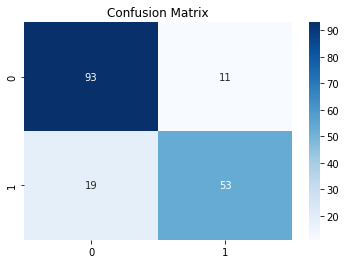

In [131]:
con = sns.heatmap(cf_matrix_sm, annot=True, cmap='Blues')
con.set_title('Confusion Matrix');
plt.show()

In [132]:
print(classification_report(y_test,y_pred_sm))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       104
           1       0.83      0.74      0.78        72

    accuracy                           0.83       176
   macro avg       0.83      0.82      0.82       176
weighted avg       0.83      0.83      0.83       176



In [63]:
hyp_ada=Hyperparameter(X_train_ada,X_test_scale,y_train_ada,y_test)

In [64]:
Dataframe_ada=hyp_ada.run()
Dataframe_ada

[I 2022-08-24 21:11:12,092] A new study created in memory with name: no-name-58d0abe9-3df8-4ba1-9d96-29704d712fef
[I 2022-08-24 21:11:12,093] A new study created in memory with name: no-name-b579b65b-c37d-45de-a39a-e822c39c42f6
[I 2022-08-24 21:11:12,094] A new study created in memory with name: no-name-55a9c5fa-730d-40d2-9cc2-f77554b7c7f6
[I 2022-08-24 21:11:13,494] Trial 0 finished with value: 0.5909090909090909 and parameters: {'max_depth': 123, 'n_estimators': 945, 'min_samples_leaf': 589, 'criterion': 'entropy', 'min_samples_split': 77, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5909090909090909.
[I 2022-08-24 21:11:14,896] Trial 1 finished with value: 0.5909090909090909 and parameters: {'max_depth': 236, 'n_estimators': 721, 'min_samples_leaf': 444, 'criterion': 'entropy', 'min_samples_split': 164, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 0 with value: 0.5909090909090909.
[I 2022-08-24 21:11:15,899] Trial

[I 2022-08-24 21:11:40,918] Trial 25 finished with value: 0.5909090909090909 and parameters: {'max_depth': 462, 'n_estimators': 344, 'min_samples_leaf': 489, 'criterion': 'gini', 'min_samples_split': 224, 'class_weight': 'balanced', 'max_features': 'log2'}. Best is trial 11 with value: 0.7840909090909091.
[I 2022-08-24 21:11:41,532] Trial 26 finished with value: 0.5909090909090909 and parameters: {'max_depth': 125, 'n_estimators': 428, 'min_samples_leaf': 373, 'criterion': 'gini', 'min_samples_split': 347, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 11 with value: 0.7840909090909091.
[I 2022-08-24 21:11:41,811] Trial 27 finished with value: 0.5909090909090909 and parameters: {'max_depth': 94, 'n_estimators': 182, 'min_samples_leaf': 869, 'criterion': 'entropy', 'min_samples_split': 276, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 11 with value: 0.7840909090909091.
[I 2022-08-24 21:11:42,317] Trial 28 finished with value: 0.4090909090909091 

[I 2022-08-24 21:12:04,172] Trial 51 finished with value: 0.5909090909090909 and parameters: {'max_depth': 278, 'n_estimators': 631, 'min_samples_leaf': 338, 'criterion': 'entropy', 'min_samples_split': 324, 'class_weight': 'balanced', 'max_features': 'log2'}. Best is trial 45 with value: 0.7954545454545454.
[I 2022-08-24 21:12:04,479] Trial 52 finished with value: 0.5909090909090909 and parameters: {'max_depth': 167, 'n_estimators': 193, 'min_samples_leaf': 598, 'criterion': 'entropy', 'min_samples_split': 14, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 45 with value: 0.7954545454545454.
[I 2022-08-24 21:12:05,482] Trial 53 finished with value: 0.4090909090909091 and parameters: {'max_depth': 7, 'n_estimators': 382, 'min_samples_leaf': 605, 'criterion': 'gini', 'min_samples_split': 386, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 45 with value: 0.7954545454545454.
[I 2022-08-24 21:12:07,281] Trial 54 finished with value: 0.77840909

[I 2022-08-24 21:12:30,177] Trial 77 finished with value: 0.5909090909090909 and parameters: {'max_depth': 304, 'n_estimators': 937, 'min_samples_leaf': 833, 'criterion': 'entropy', 'min_samples_split': 370, 'class_weight': 'balanced', 'max_features': 'log2'}. Best is trial 63 with value: 0.8125.
[I 2022-08-24 21:12:31,145] Trial 78 finished with value: 0.4090909090909091 and parameters: {'max_depth': 420, 'n_estimators': 455, 'min_samples_leaf': 916, 'criterion': 'gini', 'min_samples_split': 15, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 63 with value: 0.8125.
[I 2022-08-24 21:12:31,615] Trial 79 finished with value: 0.7727272727272727 and parameters: {'max_depth': 275, 'n_estimators': 300, 'min_samples_leaf': 63, 'criterion': 'gini', 'min_samples_split': 344, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 63 with value: 0.8125.
[I 2022-08-24 21:12:32,441] Trial 80 finished with value: 0.5909090909090909 and parameters: {'max_depth':

[W 2022-08-24 21:12:48,956] The parameter 'max_features' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:12:49,929] Trial 1 finished with value: 0.5909090909090909 and parameters: {'max_depth': 179, 'n_estimators': 665, 'min_samples_leaf': 520, 'criterion': 'entropy', 'min_samples_split': 277, 'class_weight': 'balanced', 'max_features': None}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:12:49,932] The parameter 'criterion' in trial#2 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalD

[W 2022-08-24 21:12:54,141] The parameter 'max_features' in trial#6 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:12:55,387] Trial 6 finished with value: 0.5909090909090909 and parameters: {'max_depth': 243, 'n_estimators': 624, 'min_samples_leaf': 585, 'criterion': 'gini', 'min_samples_split': 368, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:12:55,389] The parameter 'criterion' in trial#7 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `Cat

[W 2022-08-24 21:12:59,249] The parameter 'max_features' in trial#11 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:13:00,169] Trial 11 finished with value: 0.5909090909090909 and parameters: {'max_depth': 158, 'n_estimators': 616, 'min_samples_leaf': 562, 'criterion': 'gini', 'min_samples_split': 395, 'class_weight': 'balanced', 'max_features': None}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:13:00,171] The parameter 'criterion' in trial#12 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalD

[W 2022-08-24 21:13:04,563] The parameter 'max_features' in trial#16 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:13:05,797] Trial 16 finished with value: 0.5909090909090909 and parameters: {'max_depth': 313, 'n_estimators': 639, 'min_samples_leaf': 558, 'criterion': 'entropy', 'min_samples_split': 257, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:13:05,800] The parameter 'criterion' in trial#17 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space o

[W 2022-08-24 21:13:10,211] The parameter 'max_features' in trial#21 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:13:11,149] Trial 21 finished with value: 0.5909090909090909 and parameters: {'max_depth': 106, 'n_estimators': 617, 'min_samples_leaf': 536, 'criterion': 'entropy', 'min_samples_split': 409, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:13:11,151] The parameter 'criterion' in trial#22 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `Categor

[W 2022-08-24 21:13:15,460] The parameter 'max_features' in trial#26 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:13:16,543] Trial 26 finished with value: 0.5909090909090909 and parameters: {'max_depth': 397, 'n_estimators': 754, 'min_samples_leaf': 481, 'criterion': 'entropy', 'min_samples_split': 284, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:13:16,545] The parameter 'criterion' in trial#27 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `Categor

[W 2022-08-24 21:13:20,563] The parameter 'max_features' in trial#31 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:13:21,280] Trial 31 finished with value: 0.5909090909090909 and parameters: {'max_depth': 362, 'n_estimators': 488, 'min_samples_leaf': 456, 'criterion': 'gini', 'min_samples_split': 470, 'class_weight': 'balanced', 'max_features': 'log2'}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:13:21,282] The parameter 'criterion' in trial#32 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `Categorica

[W 2022-08-24 21:13:25,933] The parameter 'max_features' in trial#36 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:13:26,937] Trial 36 finished with value: 0.5909090909090909 and parameters: {'max_depth': 281, 'n_estimators': 688, 'min_samples_leaf': 515, 'criterion': 'entropy', 'min_samples_split': 259, 'class_weight': 'balanced', 'max_features': 'log2'}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:13:26,940] The parameter 'criterion' in trial#37 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `Categor

[W 2022-08-24 21:13:31,667] The parameter 'max_features' in trial#41 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:13:33,396] Trial 41 finished with value: 0.5909090909090909 and parameters: {'max_depth': 260, 'n_estimators': 843, 'min_samples_leaf': 579, 'criterion': 'entropy', 'min_samples_split': 241, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:13:33,399] The parameter 'criterion' in trial#42 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space o

[W 2022-08-24 21:13:38,733] The parameter 'max_features' in trial#46 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:13:39,841] Trial 46 finished with value: 0.5909090909090909 and parameters: {'max_depth': 157, 'n_estimators': 559, 'min_samples_leaf': 584, 'criterion': 'entropy', 'min_samples_split': 263, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:13:39,843] The parameter 'criterion' in trial#47 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or 

[W 2022-08-24 21:13:45,375] The parameter 'max_features' in trial#51 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:13:47,070] Trial 51 finished with value: 0.5909090909090909 and parameters: {'max_depth': 316, 'n_estimators': 861, 'min_samples_leaf': 577, 'criterion': 'gini', 'min_samples_split': 265, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:13:47,073] The parameter 'criterion' in trial#52 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `Ca

[W 2022-08-24 21:13:52,598] The parameter 'max_features' in trial#56 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:13:54,179] Trial 56 finished with value: 0.5909090909090909 and parameters: {'max_depth': 288, 'n_estimators': 811, 'min_samples_leaf': 536, 'criterion': 'entropy', 'min_samples_split': 192, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:13:54,182] The parameter 'criterion' in trial#57 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or 

[W 2022-08-24 21:14:00,436] The parameter 'max_features' in trial#61 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:14:01,520] Trial 61 finished with value: 0.5909090909090909 and parameters: {'max_depth': 389, 'n_estimators': 735, 'min_samples_leaf': 489, 'criterion': 'gini', 'min_samples_split': 151, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:14:01,523] The parameter 'criterion' in trial#62 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `Categorica

[W 2022-08-24 21:14:06,257] The parameter 'max_features' in trial#66 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:14:07,864] Trial 66 finished with value: 0.5909090909090909 and parameters: {'max_depth': 226, 'n_estimators': 832, 'min_samples_leaf': 541, 'criterion': 'entropy', 'min_samples_split': 158, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:14:07,866] The parameter 'criterion' in trial#67 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space o

[W 2022-08-24 21:14:13,369] The parameter 'max_features' in trial#71 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:14:14,769] Trial 71 finished with value: 0.5909090909090909 and parameters: {'max_depth': 250, 'n_estimators': 720, 'min_samples_leaf': 544, 'criterion': 'gini', 'min_samples_split': 312, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:14:14,772] The parameter 'criterion' in trial#72 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `

[W 2022-08-24 21:14:21,174] The parameter 'max_features' in trial#76 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:14:22,667] Trial 76 finished with value: 0.5909090909090909 and parameters: {'max_depth': 266, 'n_estimators': 756, 'min_samples_leaf': 444, 'criterion': 'gini', 'min_samples_split': 180, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:14:22,669] The parameter 'criterion' in trial#77 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `

[W 2022-08-24 21:14:27,932] The parameter 'max_features' in trial#81 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:14:29,346] Trial 81 finished with value: 0.5909090909090909 and parameters: {'max_depth': 188, 'n_estimators': 975, 'min_samples_leaf': 666, 'criterion': 'entropy', 'min_samples_split': 138, 'class_weight': 'balanced', 'max_features': None}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:14:29,349] The parameter 'criterion' in trial#82 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `Categoric

[W 2022-08-24 21:14:34,255] The parameter 'max_features' in trial#86 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:14:36,048] Trial 86 finished with value: 0.5909090909090909 and parameters: {'max_depth': 340, 'n_estimators': 894, 'min_samples_leaf': 608, 'criterion': 'entropy', 'min_samples_split': 169, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:14:36,050] The parameter 'criterion' in trial#87 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space o

[W 2022-08-24 21:14:41,504] The parameter 'max_features' in trial#91 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:14:42,651] Trial 91 finished with value: 0.4090909090909091 and parameters: {'max_depth': 321, 'n_estimators': 793, 'min_samples_leaf': 512, 'criterion': 'gini', 'min_samples_split': 261, 'class_weight': 'balanced', 'max_features': 'log2'}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:14:42,654] The parameter 'criterion' in trial#92 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `Categorica

[W 2022-08-24 21:14:49,311] The parameter 'max_features' in trial#96 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:14:50,405] Trial 96 finished with value: 0.5909090909090909 and parameters: {'max_depth': 189, 'n_estimators': 761, 'min_samples_leaf': 517, 'criterion': 'gini', 'min_samples_split': 154, 'class_weight': 'balanced', 'max_features': None}. Best is trial 0 with value: 0.6363636363636364.
[W 2022-08-24 21:14:50,409] The parameter 'criterion' in trial#97 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalD

[I 2022-08-24 21:15:03,902] Trial 8 finished with value: 0.5909090909090909 and parameters: {'max_depth': 349, 'n_estimators': 633, 'min_samples_leaf': 923, 'criterion': 'entropy', 'min_samples_split': 125, 'class_weight': 'balanced', 'max_features': 'log2'}. Best is trial 0 with value: 0.5909090909090909.
[I 2022-08-24 21:15:04,500] Trial 9 finished with value: 0.4090909090909091 and parameters: {'max_depth': 267, 'n_estimators': 301, 'min_samples_leaf': 990, 'criterion': 'gini', 'min_samples_split': 284, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 0 with value: 0.5909090909090909.
[I 2022-08-24 21:15:06,494] Trial 10 finished with value: 0.8011363636363636 and parameters: {'max_depth': 21, 'n_estimators': 955, 'min_samples_leaf': 41, 'criterion': 'entropy', 'min_samples_split': 3, 'class_weight': 'balanced', 'max_features': None}. Best is trial 10 with value: 0.8011363636363636.
[I 2022-08-24 21:15:08,525] Trial 11 finished with value: 0.8068181818181

[I 2022-08-24 21:15:43,947] Trial 34 finished with value: 0.7954545454545454 and parameters: {'max_depth': 35, 'n_estimators': 466, 'min_samples_leaf': 16, 'criterion': 'gini', 'min_samples_split': 95, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 13 with value: 0.8465909090909091.
[I 2022-08-24 21:15:45,331] Trial 35 finished with value: 0.6647727272727273 and parameters: {'max_depth': 183, 'n_estimators': 748, 'min_samples_leaf': 230, 'criterion': 'entropy', 'min_samples_split': 28, 'class_weight': 'balanced', 'max_features': None}. Best is trial 13 with value: 0.8465909090909091.
[I 2022-08-24 21:15:46,128] Trial 36 finished with value: 0.5909090909090909 and parameters: {'max_depth': 445, 'n_estimators': 487, 'min_samples_leaf': 295, 'criterion': 'entropy', 'min_samples_split': 47, 'class_weight': 'balanced', 'max_features': None}. Best is trial 13 with value: 0.8465909090909091.
[I 2022-08-24 21:15:46,468] Trial 37 finished with value: 0.80113636363636

[I 2022-08-24 21:16:29,256] Trial 60 finished with value: 0.8068181818181818 and parameters: {'max_depth': 65, 'n_estimators': 268, 'min_samples_leaf': 30, 'criterion': 'gini', 'min_samples_split': 169, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 13 with value: 0.8465909090909091.
[I 2022-08-24 21:16:31,855] Trial 61 finished with value: 0.8238636363636364 and parameters: {'max_depth': 217, 'n_estimators': 911, 'min_samples_leaf': 24, 'criterion': 'entropy', 'min_samples_split': 34, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 13 with value: 0.8465909090909091.
[I 2022-08-24 21:16:34,590] Trial 62 finished with value: 0.8295454545454546 and parameters: {'max_depth': 246, 'n_estimators': 892, 'min_samples_leaf': 4, 'criterion': 'entropy', 'min_samples_split': 91, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 13 with value: 0.8465909090909091.
[I 2022-08-24 21:16:36,519] Trial 63 finished with value

[I 2022-08-24 21:17:16,492] Trial 86 finished with value: 0.7784090909090909 and parameters: {'max_depth': 78, 'n_estimators': 633, 'min_samples_leaf': 96, 'criterion': 'entropy', 'min_samples_split': 16, 'class_weight': 'balanced', 'max_features': None}. Best is trial 13 with value: 0.8465909090909091.
[I 2022-08-24 21:17:17,607] Trial 87 finished with value: 0.8011363636363636 and parameters: {'max_depth': 68, 'n_estimators': 555, 'min_samples_leaf': 53, 'criterion': 'entropy', 'min_samples_split': 44, 'class_weight': 'balanced', 'max_features': None}. Best is trial 13 with value: 0.8465909090909091.
[I 2022-08-24 21:17:18,564] Trial 88 finished with value: 0.5909090909090909 and parameters: {'max_depth': 34, 'n_estimators': 654, 'min_samples_leaf': 347, 'criterion': 'entropy', 'min_samples_split': 28, 'class_weight': 'balanced', 'max_features': None}. Best is trial 13 with value: 0.8465909090909091.
[I 2022-08-24 21:17:19,575] Trial 89 finished with value: 0.7784090909090909 and par

,Value
Halving_random_best_params,"{'n_estimators': 50, 'min_samples_split': 30, ..."
Halving_random_best_score,0.823864
random_study_best_params,"{'max_depth': 472, 'n_estimators': 133, 'min_s..."
random_study_best_value,0.8125
cmaes_study_best_params,"{'max_depth': 75, 'n_estimators': 555, 'min_sa..."
cmaes_study_best_value,0.636364
tpe_study_best_params,"{'max_depth': 5, 'n_estimators': 833, 'min_sam..."
tpe_study_best_value,0.846591
Halving_grid_best_params,"{'class_weight': 'balanced', 'criterion': 'gin..."
Halving_Grid_best_score,0.823864


In [97]:
Feature_values_ada=Dataframe_ada["Value"].tolist()
Feature_values_ada

[{'n_estimators': 50,
  'min_samples_split': 30,
  'min_samples_leaf': 2,
  'max_features': 'sqrt',
  'max_depth': 100,
  'criterion': 'gini',
  'class_weight': 'balanced_subsample'},
 0.8238636363636364,
 {'max_depth': 472,
  'n_estimators': 133,
  'min_samples_leaf': 41,
  'criterion': 'entropy',
  'min_samples_split': 66,
  'class_weight': 'balanced',
  'max_features': 'log2'},
 0.8125,
 {'max_depth': 75,
  'n_estimators': 555,
  'min_samples_leaf': 206,
  'criterion': 'entropy',
  'min_samples_split': 439,
  'class_weight': 'balanced_subsample',
  'max_features': 'sqrt'},
 0.6363636363636364,
 {'max_depth': 5,
  'n_estimators': 833,
  'min_samples_leaf': 6,
  'criterion': 'entropy',
  'min_samples_split': 21,
  'class_weight': 'balanced',
  'max_features': None},
 0.8465909090909091,
 {'class_weight': 'balanced',
  'criterion': 'gini',
  'max_depth': 10,
  'max_features': None,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.8238636363636364]

In [133]:
model_ada=RandomForestClassifier(n_estimators=833,
  min_samples_split=21,
  min_samples_leaf=6,
  max_features=None,
  max_depth=5,
  criterion='entropy',
  class_weight='balanced')

In [134]:
model_ada.fit(X_train_ada,y_train_ada)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=None, min_samples_leaf=6,
                       min_samples_split=21, n_estimators=833)

In [135]:
y_pred_ada=model_ada.predict(X_test_scale)

In [136]:
model_ada.score(X_test_scale,y_test)

0.8125

In [138]:
model_ada.score(X_train_ada,y_train_ada)

0.7871581450653984

In [139]:
cf_matrix_ada = confusion_matrix(y_test,y_pred_ada)

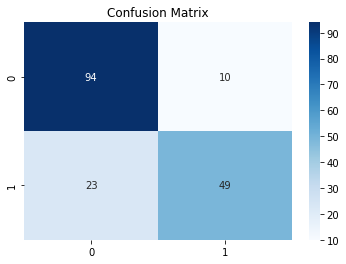

In [141]:
con = sns.heatmap(cf_matrix_ada, annot=True, cmap='Blues')
con.set_title('Confusion Matrix');
plt.show()

In [142]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       104
           1       0.83      0.68      0.75        72

    accuracy                           0.81       176
   macro avg       0.82      0.79      0.80       176
weighted avg       0.81      0.81      0.81       176



In [65]:
hyp_one=Hyperparameter(X_train_one,X_test_scale,y_train_one,y_test)

In [66]:
Dataframe_one=hyp_one.run()
Dataframe_one

[I 2022-08-24 21:20:05,376] A new study created in memory with name: no-name-6ad8a3fb-ad9d-4f6c-924e-77b5baafdab6
[I 2022-08-24 21:20:05,377] A new study created in memory with name: no-name-f5d0e068-cde8-4c4b-99d5-293ee7127c8b
[I 2022-08-24 21:20:05,378] A new study created in memory with name: no-name-b97e603c-1677-4242-ae20-a3f61552f058
[I 2022-08-24 21:20:06,881] Trial 0 finished with value: 0.7840909090909091 and parameters: {'max_depth': 430, 'n_estimators': 736, 'min_samples_leaf': 31, 'criterion': 'entropy', 'min_samples_split': 122, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 0 with value: 0.7840909090909091.
[I 2022-08-24 21:20:07,302] Trial 1 finished with value: 0.5909090909090909 and parameters: {'max_depth': 334, 'n_estimators': 227, 'min_samples_leaf': 509, 'criterion': 'gini', 'min_samples_split': 86, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 0 with value: 0.7840909090909091.
[I 2022-08-24 21:20:07,518]

[I 2022-08-24 21:20:29,560] Trial 24 finished with value: 0.5909090909090909 and parameters: {'max_depth': 316, 'n_estimators': 347, 'min_samples_leaf': 863, 'criterion': 'gini', 'min_samples_split': 356, 'class_weight': 'balanced', 'max_features': None}. Best is trial 0 with value: 0.7840909090909091.
[I 2022-08-24 21:20:31,470] Trial 25 finished with value: 0.6363636363636364 and parameters: {'max_depth': 90, 'n_estimators': 998, 'min_samples_leaf': 197, 'criterion': 'entropy', 'min_samples_split': 389, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7840909090909091.
[I 2022-08-24 21:20:31,779] Trial 26 finished with value: 0.5909090909090909 and parameters: {'max_depth': 32, 'n_estimators': 212, 'min_samples_leaf': 771, 'criterion': 'entropy', 'min_samples_split': 309, 'class_weight': 'balanced', 'max_features': None}. Best is trial 0 with value: 0.7840909090909091.
[I 2022-08-24 21:20:32,820] Trial 27 finished with value: 0.590909090909

[I 2022-08-24 21:20:52,924] Trial 50 finished with value: 0.5909090909090909 and parameters: {'max_depth': 444, 'n_estimators': 461, 'min_samples_leaf': 235, 'criterion': 'entropy', 'min_samples_split': 151, 'class_weight': 'balanced', 'max_features': None}. Best is trial 43 with value: 0.7897727272727273.
[I 2022-08-24 21:20:53,471] Trial 51 finished with value: 0.5909090909090909 and parameters: {'max_depth': 139, 'n_estimators': 285, 'min_samples_leaf': 835, 'criterion': 'gini', 'min_samples_split': 495, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 43 with value: 0.7897727272727273.
[I 2022-08-24 21:20:54,982] Trial 52 finished with value: 0.5909090909090909 and parameters: {'max_depth': 73, 'n_estimators': 812, 'min_samples_leaf': 702, 'criterion': 'gini', 'min_samples_split': 295, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 43 with value: 0.7897727272727273.
[I 2022-08-24 21:20:56,456] Trial 53 finished with value: 0.5

[I 2022-08-24 21:21:17,559] Trial 76 finished with value: 0.5909090909090909 and parameters: {'max_depth': 119, 'n_estimators': 423, 'min_samples_leaf': 873, 'criterion': 'gini', 'min_samples_split': 94, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 43 with value: 0.7897727272727273.
[I 2022-08-24 21:21:18,944] Trial 77 finished with value: 0.5909090909090909 and parameters: {'max_depth': 291, 'n_estimators': 976, 'min_samples_leaf': 485, 'criterion': 'entropy', 'min_samples_split': 395, 'class_weight': 'balanced', 'max_features': None}. Best is trial 43 with value: 0.7897727272727273.
[I 2022-08-24 21:21:19,572] Trial 78 finished with value: 0.5909090909090909 and parameters: {'max_depth': 15, 'n_estimators': 429, 'min_samples_leaf': 229, 'criterion': 'entropy', 'min_samples_split': 241, 'class_weight': 'balanced', 'max_features': None}. Best is trial 43 with value: 0.7897727272727273.
[I 2022-08-24 21:21:20,012] Trial 79 finished with value: 0.590909090

[W 2022-08-24 21:21:39,050] The parameter 'class_weight' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:21:39,051] The parameter 'max_features' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:21:40,309] Trial 1 finished with value: 0.5909090909090909 and parameters: {'max_depth': 292, 'n_estima

[W 2022-08-24 21:21:43,461] The parameter 'class_weight' in trial#6 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:21:43,462] The parameter 'max_features' in trial#6 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:21:44,036] Trial 6 finished with value: 0.5909090909090909 and parameters: {'max_depth': 352, 'n_estima

[W 2022-08-24 21:21:48,083] The parameter 'class_weight' in trial#11 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:21:48,084] The parameter 'max_features' in trial#11 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:21:48,921] Trial 11 finished with value: 0.5909090909090909 and parameters: {'max_depth': 307, 'n_est

[W 2022-08-24 21:21:52,532] The parameter 'class_weight' in trial#16 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:21:52,532] The parameter 'max_features' in trial#16 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:21:53,323] Trial 16 finished with value: 0.5909090909090909 and parameters: {'max_depth': 328, 'n_est

[W 2022-08-24 21:21:57,841] The parameter 'class_weight' in trial#21 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:21:57,841] The parameter 'max_features' in trial#21 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:21:58,903] Trial 21 finished with value: 0.5909090909090909 and parameters: {'max_depth': 341, 'n_est

[W 2022-08-24 21:22:03,282] The parameter 'class_weight' in trial#26 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:22:03,283] The parameter 'max_features' in trial#26 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:22:04,802] Trial 26 finished with value: 0.5909090909090909 and parameters: {'max_depth': 448, 'n_est

[W 2022-08-24 21:22:08,795] The parameter 'class_weight' in trial#31 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:22:08,795] The parameter 'max_features' in trial#31 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:22:09,562] Trial 31 finished with value: 0.5909090909090909 and parameters: {'max_depth': 248, 'n_est

[W 2022-08-24 21:22:13,241] The parameter 'class_weight' in trial#36 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:22:13,242] The parameter 'max_features' in trial#36 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:22:14,492] Trial 36 finished with value: 0.5909090909090909 and parameters: {'max_depth': 316, 'n_est

[W 2022-08-24 21:22:19,271] The parameter 'class_weight' in trial#41 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:22:19,272] The parameter 'max_features' in trial#41 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:22:20,232] Trial 41 finished with value: 0.6363636363636364 and parameters: {'max_depth': 374, 'n_est

[W 2022-08-24 21:22:24,738] The parameter 'class_weight' in trial#46 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:22:24,739] The parameter 'max_features' in trial#46 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:22:26,055] Trial 46 finished with value: 0.5909090909090909 and parameters: {'max_depth': 444, 'n_est

[W 2022-08-24 21:22:29,968] The parameter 'class_weight' in trial#51 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:22:29,969] The parameter 'max_features' in trial#51 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:22:31,004] Trial 51 finished with value: 0.7784090909090909 and parameters: {'max_depth': 221, 'n_est

[W 2022-08-24 21:22:35,573] The parameter 'class_weight' in trial#56 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:22:35,574] The parameter 'max_features' in trial#56 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:22:36,658] Trial 56 finished with value: 0.7784090909090909 and parameters: {'max_depth': 296, 'n_est

[W 2022-08-24 21:22:41,301] The parameter 'class_weight' in trial#61 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:22:41,302] The parameter 'max_features' in trial#61 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:22:42,449] Trial 61 finished with value: 0.7954545454545454 and parameters: {'max_depth': 360, 'n_est

[W 2022-08-24 21:22:47,585] The parameter 'class_weight' in trial#66 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:22:47,585] The parameter 'max_features' in trial#66 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:22:48,775] Trial 66 finished with value: 0.7784090909090909 and parameters: {'max_depth': 391, 'n_est

[W 2022-08-24 21:22:53,638] The parameter 'class_weight' in trial#71 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:22:53,639] The parameter 'max_features' in trial#71 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:22:55,057] Trial 71 finished with value: 0.6363636363636364 and parameters: {'max_depth': 79, 'n_esti

[W 2022-08-24 21:23:00,292] The parameter 'class_weight' in trial#76 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:23:00,293] The parameter 'max_features' in trial#76 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:23:01,686] Trial 76 finished with value: 0.7727272727272727 and parameters: {'max_depth': 366, 'n_est

[W 2022-08-24 21:23:07,161] The parameter 'class_weight' in trial#81 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:23:07,162] The parameter 'max_features' in trial#81 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:23:08,536] Trial 81 finished with value: 0.7897727272727273 and parameters: {'max_depth': 488, 'n_est

[W 2022-08-24 21:23:13,974] The parameter 'class_weight' in trial#86 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:23:13,975] The parameter 'max_features' in trial#86 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:23:15,107] Trial 86 finished with value: 0.6647727272727273 and parameters: {'max_depth': 366, 'n_est

[W 2022-08-24 21:23:20,523] The parameter 'class_weight' in trial#91 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:23:20,524] The parameter 'max_features' in trial#91 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:23:21,804] Trial 91 finished with value: 0.7784090909090909 and parameters: {'max_depth': 487, 'n_est

[W 2022-08-24 21:23:26,437] The parameter 'class_weight' in trial#96 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:23:26,438] The parameter 'max_features' in trial#96 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:23:27,508] Trial 96 finished with value: 0.7784090909090909 and parameters: {'max_depth': 360, 'n_est

[I 2022-08-24 21:23:39,374] Trial 6 finished with value: 0.7784090909090909 and parameters: {'max_depth': 300, 'n_estimators': 728, 'min_samples_leaf': 30, 'criterion': 'entropy', 'min_samples_split': 386, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 5 with value: 0.7954545454545454.
[I 2022-08-24 21:23:41,068] Trial 7 finished with value: 0.5909090909090909 and parameters: {'max_depth': 462, 'n_estimators': 908, 'min_samples_leaf': 443, 'criterion': 'entropy', 'min_samples_split': 189, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 5 with value: 0.7954545454545454.
[I 2022-08-24 21:23:41,793] Trial 8 finished with value: 0.5909090909090909 and parameters: {'max_depth': 192, 'n_estimators': 510, 'min_samples_leaf': 960, 'criterion': 'entropy', 'min_samples_split': 381, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 5 with value: 0.7954545454545454.
[I 2022-08-24 21:23:42,063] Trial 9 finished with value: 0.

[I 2022-08-24 21:24:04,620] Trial 32 finished with value: 0.7784090909090909 and parameters: {'max_depth': 372, 'n_estimators': 913, 'min_samples_leaf': 73, 'criterion': 'entropy', 'min_samples_split': 287, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 5 with value: 0.7954545454545454.
[I 2022-08-24 21:24:06,110] Trial 33 finished with value: 0.7784090909090909 and parameters: {'max_depth': 320, 'n_estimators': 676, 'min_samples_leaf': 68, 'criterion': 'entropy', 'min_samples_split': 221, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 5 with value: 0.7954545454545454.
[I 2022-08-24 21:24:07,268] Trial 34 finished with value: 0.5909090909090909 and parameters: {'max_depth': 274, 'n_estimators': 793, 'min_samples_leaf': 263, 'criterion': 'entropy', 'min_samples_split': 93, 'class_weight': 'balanced', 'max_features': None}. Best is trial 5 with value: 0.7954545454545454.
[I 2022-08-24 21:24:08,604] Trial 35 finished with value: 0.77

[I 2022-08-24 21:24:31,330] Trial 58 finished with value: 0.7784090909090909 and parameters: {'max_depth': 59, 'n_estimators': 790, 'min_samples_leaf': 34, 'criterion': 'entropy', 'min_samples_split': 306, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 5 with value: 0.7954545454545454.
[I 2022-08-24 21:24:33,242] Trial 59 finished with value: 0.6647727272727273 and parameters: {'max_depth': 307, 'n_estimators': 965, 'min_samples_leaf': 174, 'criterion': 'entropy', 'min_samples_split': 291, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 5 with value: 0.7954545454545454.
[I 2022-08-24 21:24:35,036] Trial 60 finished with value: 0.7784090909090909 and parameters: {'max_depth': 29, 'n_estimators': 814, 'min_samples_leaf': 66, 'criterion': 'entropy', 'min_samples_split': 120, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 5 with value: 0.7954545454545454.
[I 2022-08-24 21:24:36,729] Trial 61 finished with va

[I 2022-08-24 21:25:16,473] Trial 83 finished with value: 0.7784090909090909 and parameters: {'max_depth': 410, 'n_estimators': 886, 'min_samples_leaf': 53, 'criterion': 'entropy', 'min_samples_split': 134, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 61 with value: 0.8011363636363636.
[I 2022-08-24 21:25:18,515] Trial 84 finished with value: 0.7840909090909091 and parameters: {'max_depth': 436, 'n_estimators': 928, 'min_samples_leaf': 19, 'criterion': 'entropy', 'min_samples_split': 168, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 61 with value: 0.8011363636363636.
[I 2022-08-24 21:25:20,407] Trial 85 finished with value: 0.7784090909090909 and parameters: {'max_depth': 423, 'n_estimators': 895, 'min_samples_leaf': 77, 'criterion': 'entropy', 'min_samples_split': 182, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 61 with value: 0.8011363636363636.
[I 2022-08-24 21:25:22,685] Trial 86 finished wit

,Value
Halving_random_best_params,"{'n_estimators': 1000, 'min_samples_split': 10..."
Halving_random_best_score,0.818182
random_study_best_params,"{'max_depth': 71, 'n_estimators': 589, 'min_sa..."
random_study_best_value,0.801136
cmaes_study_best_params,"{'max_depth': 445, 'n_estimators': 811, 'min_s..."
cmaes_study_best_value,0.806818
tpe_study_best_params,"{'max_depth': 316, 'n_estimators': 748, 'min_s..."
tpe_study_best_value,0.801136
Halving_grid_best_params,"{'class_weight': 'balanced_subsample', 'criter..."
Halving_Grid_best_score,0.789773


In [98]:
Feature_values_one=Dataframe_one["Value"].tolist()
Feature_values_one

[{'n_estimators': 1000,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_features': None,
  'max_depth': 15,
  'criterion': 'entropy',
  'class_weight': 'balanced'},
 0.8181818181818182,
 {'max_depth': 71,
  'n_estimators': 589,
  'min_samples_leaf': 5,
  'criterion': 'gini',
  'min_samples_split': 14,
  'class_weight': 'balanced',
  'max_features': 'sqrt'},
 0.8011363636363636,
 {'max_depth': 445,
  'n_estimators': 811,
  'min_samples_leaf': 21,
  'criterion': 'gini',
  'min_samples_split': 112,
  'class_weight': 'balanced_subsample',
  'max_features': None},
 0.8068181818181818,
 {'max_depth': 316,
  'n_estimators': 748,
  'min_samples_leaf': 2,
  'criterion': 'entropy',
  'min_samples_split': 194,
  'class_weight': 'balanced_subsample',
  'max_features': None},
 0.8011363636363636,
 {'class_weight': 'balanced_subsample',
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 'log2',
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 50},
 0.7897727

In [143]:
model_one=RandomForestClassifier(n_estimators=1000,
  min_samples_split=10,
  min_samples_leaf=2,
  max_features=None,
  max_depth=15,
  criterion='entropy',
  class_weight='balanced')

In [144]:
model_one.fit(X_train_one,y_train_one)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features=None, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=1000)

In [145]:
y_pred_one=model_one.predict(X_test_scale)

In [146]:
model_ada.score(X_test_scale,y_test)

0.8181818181818182

In [147]:
model_ada.score(X_train_one,y_train_one)

0.8778625954198473

In [160]:
cf_matrix_one = confusion_matrix(y_test,y_pred_one)

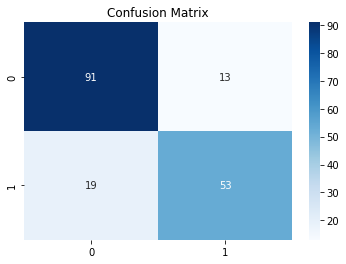

In [161]:
con = sns.heatmap(cf_matrix_one, annot=True, cmap='Blues')
con.set_title('Confusion Matrix');
plt.show()

In [150]:
print(classification_report(y_test,y_pred_one))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       104
           1       0.80      0.74      0.77        72

    accuracy                           0.82       176
   macro avg       0.82      0.81      0.81       176
weighted avg       0.82      0.82      0.82       176



In [67]:
hyp_tm=Hyperparameter(X_train_tm,X_test_scale,y_train_tm,y_test)

In [68]:
Dataframe_tm=hyp_tm.run()
Dataframe_tm

[I 2022-08-24 21:28:18,543] A new study created in memory with name: no-name-02b9845c-6513-409f-ac91-351e16f4fccb
[I 2022-08-24 21:28:18,544] A new study created in memory with name: no-name-963e951d-87db-4924-8a05-fc42f17e1571
[I 2022-08-24 21:28:18,546] A new study created in memory with name: no-name-0a22b3c0-3a24-4595-ab64-5f6f3a9b3d14
[I 2022-08-24 21:28:18,710] Trial 0 finished with value: 0.5909090909090909 and parameters: {'max_depth': 280, 'n_estimators': 109, 'min_samples_leaf': 955, 'criterion': 'entropy', 'min_samples_split': 449, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5909090909090909.
[I 2022-08-24 21:28:19,039] Trial 1 finished with value: 0.5681818181818182 and parameters: {'max_depth': 412, 'n_estimators': 218, 'min_samples_leaf': 218, 'criterion': 'gini', 'min_samples_split': 206, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5909090909090909.
[I 2022-08-24 21:28:20,255] Trial 2 finished 

[I 2022-08-24 21:28:41,722] Trial 24 finished with value: 0.5909090909090909 and parameters: {'max_depth': 465, 'n_estimators': 394, 'min_samples_leaf': 247, 'criterion': 'entropy', 'min_samples_split': 308, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 14 with value: 0.8238636363636364.
[I 2022-08-24 21:28:42,319] Trial 25 finished with value: 0.7784090909090909 and parameters: {'max_depth': 71, 'n_estimators': 299, 'min_samples_leaf': 139, 'criterion': 'gini', 'min_samples_split': 231, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 14 with value: 0.8238636363636364.
[I 2022-08-24 21:28:42,592] Trial 26 finished with value: 0.5909090909090909 and parameters: {'max_depth': 111, 'n_estimators': 142, 'min_samples_leaf': 811, 'criterion': 'entropy', 'min_samples_split': 348, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 14 with value: 0.8238636363636364.
[I 2022-08-24 21:28:43,939] Trial 27 finished wi

[I 2022-08-24 21:29:06,530] Trial 50 finished with value: 0.6818181818181818 and parameters: {'max_depth': 122, 'n_estimators': 322, 'min_samples_leaf': 148, 'criterion': 'gini', 'min_samples_split': 246, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 14 with value: 0.8238636363636364.
[I 2022-08-24 21:29:06,935] Trial 51 finished with value: 0.5909090909090909 and parameters: {'max_depth': 424, 'n_estimators': 174, 'min_samples_leaf': 294, 'criterion': 'gini', 'min_samples_split': 369, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 14 with value: 0.8238636363636364.
[I 2022-08-24 21:29:08,647] Trial 52 finished with value: 0.5909090909090909 and parameters: {'max_depth': 75, 'n_estimators': 861, 'min_samples_leaf': 932, 'criterion': 'gini', 'min_samples_split': 359, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 14 with value: 0.8238636363636364.
[I 2022-08-24 21:29:09,278] Trial 53 finished with value: 0.

[I 2022-08-24 21:29:28,045] Trial 76 finished with value: 0.5909090909090909 and parameters: {'max_depth': 239, 'n_estimators': 858, 'min_samples_leaf': 267, 'criterion': 'entropy', 'min_samples_split': 314, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 14 with value: 0.8238636363636364.
[I 2022-08-24 21:29:29,318] Trial 77 finished with value: 0.7840909090909091 and parameters: {'max_depth': 336, 'n_estimators': 605, 'min_samples_leaf': 40, 'criterion': 'entropy', 'min_samples_split': 158, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 14 with value: 0.8238636363636364.
[I 2022-08-24 21:29:29,636] Trial 78 finished with value: 0.5909090909090909 and parameters: {'max_depth': 484, 'n_estimators': 200, 'min_samples_leaf': 267, 'criterion': 'gini', 'min_samples_split': 177, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 14 with value: 0.8238636363636364.
[I 2022-08-24 21:29:30,632] Trial 79 finished with val

[W 2022-08-24 21:29:49,331] The parameter 'class_weight' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:29:49,332] The parameter 'max_features' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:29:50,114] Trial 1 finished with value: 0.5909090909090909 and parameters: {'max_depth': 233, 'n_estima

[W 2022-08-24 21:29:53,648] The parameter 'class_weight' in trial#6 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:29:53,649] The parameter 'max_features' in trial#6 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:29:54,813] Trial 6 finished with value: 0.5909090909090909 and parameters: {'max_depth': 279, 'n_estima

[W 2022-08-24 21:29:58,691] The parameter 'class_weight' in trial#11 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:29:58,691] The parameter 'max_features' in trial#11 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:29:59,484] Trial 11 finished with value: 0.5909090909090909 and parameters: {'max_depth': 240, 'n_est

[W 2022-08-24 21:30:02,464] The parameter 'class_weight' in trial#16 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:30:02,465] The parameter 'max_features' in trial#16 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:30:03,165] Trial 16 finished with value: 0.5909090909090909 and parameters: {'max_depth': 356, 'n_est

[W 2022-08-24 21:30:06,535] The parameter 'class_weight' in trial#21 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:30:06,536] The parameter 'max_features' in trial#21 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:30:07,289] Trial 21 finished with value: 0.5909090909090909 and parameters: {'max_depth': 176, 'n_est

[W 2022-08-24 21:30:10,425] The parameter 'class_weight' in trial#26 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:30:10,426] The parameter 'max_features' in trial#26 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:30:11,456] Trial 26 finished with value: 0.5909090909090909 and parameters: {'max_depth': 346, 'n_est

[W 2022-08-24 21:30:14,288] The parameter 'class_weight' in trial#31 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:30:14,289] The parameter 'max_features' in trial#31 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:30:14,909] Trial 31 finished with value: 0.5909090909090909 and parameters: {'max_depth': 190, 'n_est

[W 2022-08-24 21:30:17,673] The parameter 'class_weight' in trial#36 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:30:17,674] The parameter 'max_features' in trial#36 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:30:18,188] Trial 36 finished with value: 0.5909090909090909 and parameters: {'max_depth': 333, 'n_est

[W 2022-08-24 21:30:20,795] The parameter 'class_weight' in trial#41 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:30:20,796] The parameter 'max_features' in trial#41 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:30:21,052] Trial 41 finished with value: 0.5909090909090909 and parameters: {'max_depth': 201, 'n_est

[W 2022-08-24 21:30:23,860] The parameter 'class_weight' in trial#46 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:30:23,860] The parameter 'max_features' in trial#46 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:30:24,516] Trial 46 finished with value: 0.5909090909090909 and parameters: {'max_depth': 336, 'n_est

[W 2022-08-24 21:30:27,335] The parameter 'class_weight' in trial#51 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:30:27,336] The parameter 'max_features' in trial#51 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:30:28,099] Trial 51 finished with value: 0.5909090909090909 and parameters: {'max_depth': 174, 'n_est

[W 2022-08-24 21:30:29,568] The parameter 'class_weight' in trial#56 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:30:29,569] The parameter 'max_features' in trial#56 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:30:29,893] Trial 56 finished with value: 0.7840909090909091 and parameters: {'max_depth': 212, 'n_est

[W 2022-08-24 21:30:31,974] The parameter 'class_weight' in trial#61 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:30:31,975] The parameter 'max_features' in trial#61 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:30:32,403] Trial 61 finished with value: 0.5909090909090909 and parameters: {'max_depth': 285, 'n_est

[W 2022-08-24 21:30:34,624] The parameter 'class_weight' in trial#66 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:30:34,625] The parameter 'max_features' in trial#66 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:30:35,190] Trial 66 finished with value: 0.5909090909090909 and parameters: {'max_depth': 292, 'n_est

[W 2022-08-24 21:30:37,043] The parameter 'class_weight' in trial#71 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:30:37,044] The parameter 'max_features' in trial#71 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:30:37,302] Trial 71 finished with value: 0.6420454545454546 and parameters: {'max_depth': 308, 'n_est

[W 2022-08-24 21:30:39,794] The parameter 'class_weight' in trial#76 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:30:39,794] The parameter 'max_features' in trial#76 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:30:40,195] Trial 76 finished with value: 0.7784090909090909 and parameters: {'max_depth': 382, 'n_est

[W 2022-08-24 21:30:44,436] The parameter 'class_weight' in trial#81 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:30:44,436] The parameter 'max_features' in trial#81 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:30:45,470] Trial 81 finished with value: 0.7840909090909091 and parameters: {'max_depth': 59, 'n_esti

[W 2022-08-24 21:30:48,588] The parameter 'class_weight' in trial#86 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:30:48,589] The parameter 'max_features' in trial#86 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:30:49,085] Trial 86 finished with value: 0.7897727272727273 and parameters: {'max_depth': 296, 'n_est

[W 2022-08-24 21:30:51,498] The parameter 'class_weight' in trial#91 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:30:51,499] The parameter 'max_features' in trial#91 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:30:52,282] Trial 91 finished with value: 0.625 and parameters: {'max_depth': 303, 'n_estimators': 509

[W 2022-08-24 21:30:55,261] The parameter 'class_weight' in trial#96 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:30:55,262] The parameter 'max_features' in trial#96 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:30:55,821] Trial 96 finished with value: 0.6647727272727273 and parameters: {'max_depth': 78, 'n_esti

[I 2022-08-24 21:31:03,067] Trial 6 finished with value: 0.5909090909090909 and parameters: {'max_depth': 301, 'n_estimators': 137, 'min_samples_leaf': 692, 'criterion': 'gini', 'min_samples_split': 345, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 2 with value: 0.7784090909090909.
[I 2022-08-24 21:31:03,460] Trial 7 finished with value: 0.5909090909090909 and parameters: {'max_depth': 245, 'n_estimators': 208, 'min_samples_leaf': 556, 'criterion': 'gini', 'min_samples_split': 224, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 2 with value: 0.7784090909090909.
[I 2022-08-24 21:31:04,275] Trial 8 finished with value: 0.5909090909090909 and parameters: {'max_depth': 452, 'n_estimators': 422, 'min_samples_leaf': 778, 'criterion': 'entropy', 'min_samples_split': 21, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 2 with value: 0.7784090909090909.
[I 2022-08-24 21:31:05,213] Trial 9 finished with val

[I 2022-08-24 21:31:32,076] Trial 32 finished with value: 0.7784090909090909 and parameters: {'max_depth': 143, 'n_estimators': 487, 'min_samples_leaf': 73, 'criterion': 'gini', 'min_samples_split': 441, 'class_weight': 'balanced', 'max_features': None}. Best is trial 27 with value: 0.7840909090909091.
[I 2022-08-24 21:31:33,234] Trial 33 finished with value: 0.7784090909090909 and parameters: {'max_depth': 164, 'n_estimators': 725, 'min_samples_leaf': 148, 'criterion': 'entropy', 'min_samples_split': 189, 'class_weight': 'balanced', 'max_features': None}. Best is trial 27 with value: 0.7840909090909091.
[I 2022-08-24 21:31:34,160] Trial 34 finished with value: 0.5909090909090909 and parameters: {'max_depth': 163, 'n_estimators': 613, 'min_samples_leaf': 152, 'criterion': 'entropy', 'min_samples_split': 454, 'class_weight': 'balanced', 'max_features': None}. Best is trial 27 with value: 0.7840909090909091.
[I 2022-08-24 21:31:35,160] Trial 35 finished with value: 0.6193181818181818 and

[I 2022-08-24 21:32:04,315] Trial 58 finished with value: 0.5909090909090909 and parameters: {'max_depth': 156, 'n_estimators': 595, 'min_samples_leaf': 319, 'criterion': 'entropy', 'min_samples_split': 122, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 27 with value: 0.7840909090909091.
[I 2022-08-24 21:32:06,006] Trial 59 finished with value: 0.7784090909090909 and parameters: {'max_depth': 400, 'n_estimators': 840, 'min_samples_leaf': 97, 'criterion': 'gini', 'min_samples_split': 314, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 27 with value: 0.7840909090909091.
[I 2022-08-24 21:32:07,477] Trial 60 finished with value: 0.7784090909090909 and parameters: {'max_depth': 69, 'n_estimators': 915, 'min_samples_leaf': 34, 'criterion': 'gini', 'min_samples_split': 269, 'class_weight': 'balanced', 'max_features': None}. Best is trial 27 with value: 0.7840909090909091.
[I 2022-08-24 21:32:08,948] Trial 61 finished with value: 0.77840

[I 2022-08-24 21:32:25,756] Trial 84 finished with value: 0.7784090909090909 and parameters: {'max_depth': 58, 'n_estimators': 163, 'min_samples_leaf': 53, 'criterion': 'entropy', 'min_samples_split': 79, 'class_weight': 'balanced', 'max_features': None}. Best is trial 72 with value: 0.8352272727272727.
[I 2022-08-24 21:32:26,242] Trial 85 finished with value: 0.7784090909090909 and parameters: {'max_depth': 129, 'n_estimators': 254, 'min_samples_leaf': 48, 'criterion': 'entropy', 'min_samples_split': 32, 'class_weight': 'balanced', 'max_features': None}. Best is trial 72 with value: 0.8352272727272727.
[I 2022-08-24 21:32:26,741] Trial 86 finished with value: 0.7784090909090909 and parameters: {'max_depth': 45, 'n_estimators': 288, 'min_samples_leaf': 83, 'criterion': 'entropy', 'min_samples_split': 41, 'class_weight': 'balanced', 'max_features': None}. Best is trial 72 with value: 0.8352272727272727.
[I 2022-08-24 21:32:27,096] Trial 87 finished with value: 0.7784090909090909 and par

,Value
Halving_random_best_params,"{'n_estimators': 1000, 'min_samples_split': 10..."
Halving_random_best_score,0.818182
random_study_best_params,"{'max_depth': 11, 'n_estimators': 625, 'min_sa..."
random_study_best_value,0.823864
cmaes_study_best_params,"{'max_depth': 275, 'n_estimators': 631, 'min_s..."
cmaes_study_best_value,0.806818
tpe_study_best_params,"{'max_depth': 89, 'n_estimators': 330, 'min_sa..."
tpe_study_best_value,0.835227
Halving_grid_best_params,"{'class_weight': 'balanced', 'criterion': 'ent..."
Halving_Grid_best_score,0.806818


In [99]:
Feature_values_tm=Dataframe_tm["Value"].tolist()
Feature_values_tm

[{'n_estimators': 1000,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_features': None,
  'max_depth': 15,
  'criterion': 'entropy',
  'class_weight': 'balanced'},
 0.8181818181818182,
 {'max_depth': 11,
  'n_estimators': 625,
  'min_samples_leaf': 3,
  'criterion': 'entropy',
  'min_samples_split': 18,
  'class_weight': 'balanced_subsample',
  'max_features': 'log2'},
 0.8238636363636364,
 {'max_depth': 275,
  'n_estimators': 631,
  'min_samples_leaf': 19,
  'criterion': 'gini',
  'min_samples_split': 17,
  'class_weight': 'balanced',
  'max_features': None},
 0.8068181818181818,
 {'max_depth': 89,
  'n_estimators': 330,
  'min_samples_leaf': 5,
  'criterion': 'gini',
  'min_samples_split': 5,
  'class_weight': 'balanced',
  'max_features': None},
 0.8352272727272727,
 {'class_weight': 'balanced',
  'criterion': 'entropy',
  'max_depth': 10,
  'max_features': None,
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 100},
 0.8068181818181818]

In [165]:
model_tm=RandomForestClassifier(n_estimators=330,
  min_samples_split=5,
  min_samples_leaf=5,
  max_features=None,
  max_depth=89,
  criterion='gini',
  class_weight='balanced')

In [166]:
model_tm.fit(X_train_tm,y_train_tm)

RandomForestClassifier(class_weight='balanced', max_depth=89, max_features=None,
                       min_samples_leaf=5, min_samples_split=5,
                       n_estimators=330)

In [153]:
y_pred_tm=model_tm.predict(X_test_scale)

In [154]:
model_tm.score(X_test_scale,y_test)

0.8409090909090909

In [155]:
model_tm.score(X_train_tm,y_train_tm)

0.9176646706586826

In [158]:
cf_matrix_tm = confusion_matrix(y_test,y_pred_tm)

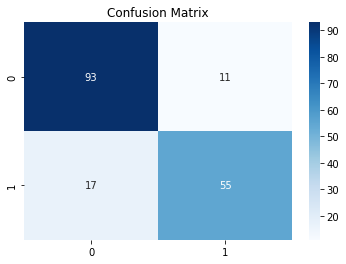

In [159]:
con = sns.heatmap(cf_matrix_tm, annot=True, cmap='Blues')
con.set_title('Confusion Matrix');
plt.show()

In [162]:
print(classification_report(y_test,y_pred_tm))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       104
           1       0.83      0.76      0.80        72

    accuracy                           0.84       176
   macro avg       0.84      0.83      0.83       176
weighted avg       0.84      0.84      0.84       176



In [69]:
hyp_neg=Hyperparameter(X_train_neg,X_test_scale,y_train_neg,y_test)

In [70]:
Dataframe_neg=hyp_neg.run()
Dataframe_neg

[I 2022-08-24 21:34:50,180] A new study created in memory with name: no-name-ac1b4f90-fb34-452d-85db-231552ef37a0
[I 2022-08-24 21:34:50,181] A new study created in memory with name: no-name-52ce98c6-de99-4d0d-8f25-edc01146b08a
[I 2022-08-24 21:34:50,183] A new study created in memory with name: no-name-b7768023-ae6a-4b08-be04-6a1319476f05
[I 2022-08-24 21:34:51,232] Trial 0 finished with value: 0.4090909090909091 and parameters: {'max_depth': 402, 'n_estimators': 718, 'min_samples_leaf': 316, 'criterion': 'gini', 'min_samples_split': 123, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.4090909090909091.
[I 2022-08-24 21:34:51,739] Trial 1 finished with value: 0.5909090909090909 and parameters: {'max_depth': 126, 'n_estimators': 271, 'min_samples_leaf': 792, 'criterion': 'entropy', 'min_samples_split': 330, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 1 with value: 0.5909090909090909.
[I 2022-08-24 21:34:52,281] Trial 2 f

[I 2022-08-24 21:35:13,486] Trial 25 finished with value: 0.5909090909090909 and parameters: {'max_depth': 354, 'n_estimators': 797, 'min_samples_leaf': 324, 'criterion': 'gini', 'min_samples_split': 469, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 6 with value: 0.7840909090909091.
[I 2022-08-24 21:35:14,695] Trial 26 finished with value: 0.4090909090909091 and parameters: {'max_depth': 149, 'n_estimators': 833, 'min_samples_leaf': 390, 'criterion': 'entropy', 'min_samples_split': 169, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 6 with value: 0.7840909090909091.
[I 2022-08-24 21:35:15,521] Trial 27 finished with value: 0.4090909090909091 and parameters: {'max_depth': 317, 'n_estimators': 558, 'min_samples_leaf': 461, 'criterion': 'gini', 'min_samples_split': 303, 'class_weight': 'balanced', 'max_features': 'log2'}. Best is trial 6 with value: 0.7840909090909091.
[I 2022-08-24 21:35:16,586] Trial 28 finished with value: 0.59090909090

[I 2022-08-24 21:35:37,650] Trial 51 finished with value: 0.4090909090909091 and parameters: {'max_depth': 126, 'n_estimators': 470, 'min_samples_leaf': 400, 'criterion': 'gini', 'min_samples_split': 438, 'class_weight': 'balanced', 'max_features': None}. Best is trial 6 with value: 0.7840909090909091.
[I 2022-08-24 21:35:38,029] Trial 52 finished with value: 0.4090909090909091 and parameters: {'max_depth': 426, 'n_estimators': 267, 'min_samples_leaf': 469, 'criterion': 'entropy', 'min_samples_split': 175, 'class_weight': 'balanced', 'max_features': 'log2'}. Best is trial 6 with value: 0.7840909090909091.
[I 2022-08-24 21:35:38,366] Trial 53 finished with value: 0.5909090909090909 and parameters: {'max_depth': 179, 'n_estimators': 178, 'min_samples_leaf': 168, 'criterion': 'gini', 'min_samples_split': 480, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 6 with value: 0.7840909090909091.
[I 2022-08-24 21:35:38,835] Trial 54 finished with value: 0.59090909090

[I 2022-08-24 21:36:00,663] Trial 77 finished with value: 0.4090909090909091 and parameters: {'max_depth': 298, 'n_estimators': 697, 'min_samples_leaf': 86, 'criterion': 'gini', 'min_samples_split': 413, 'class_weight': 'balanced', 'max_features': None}. Best is trial 6 with value: 0.7840909090909091.
[I 2022-08-24 21:36:00,886] Trial 78 finished with value: 0.4090909090909091 and parameters: {'max_depth': 463, 'n_estimators': 120, 'min_samples_leaf': 647, 'criterion': 'entropy', 'min_samples_split': 463, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 6 with value: 0.7840909090909091.
[I 2022-08-24 21:36:01,490] Trial 79 finished with value: 0.6193181818181818 and parameters: {'max_depth': 326, 'n_estimators': 401, 'min_samples_leaf': 184, 'criterion': 'entropy', 'min_samples_split': 368, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 6 with value: 0.7840909090909091.
[I 2022-08-24 21:36:02,111] Trial 80 finished with value: 0.590909090

[W 2022-08-24 21:36:17,226] The parameter 'class_weight' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:36:17,226] The parameter 'max_features' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:36:18,003] Trial 1 finished with value: 0.4090909090909091 and parameters: {'max_depth': 266, 'n_estima

[W 2022-08-24 21:36:21,233] The parameter 'class_weight' in trial#6 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:36:21,234] The parameter 'max_features' in trial#6 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:36:21,788] Trial 6 finished with value: 0.4090909090909091 and parameters: {'max_depth': 294, 'n_estima

[W 2022-08-24 21:36:25,365] The parameter 'class_weight' in trial#11 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:36:25,365] The parameter 'max_features' in trial#11 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:36:26,390] Trial 11 finished with value: 0.5909090909090909 and parameters: {'max_depth': 212, 'n_est

[W 2022-08-24 21:36:30,499] The parameter 'class_weight' in trial#16 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:36:30,500] The parameter 'max_features' in trial#16 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:36:31,374] Trial 16 finished with value: 0.4090909090909091 and parameters: {'max_depth': 297, 'n_est

[W 2022-08-24 21:36:35,474] The parameter 'class_weight' in trial#21 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:36:35,475] The parameter 'max_features' in trial#21 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:36:36,228] Trial 21 finished with value: 0.4090909090909091 and parameters: {'max_depth': 281, 'n_est

[W 2022-08-24 21:36:41,224] The parameter 'class_weight' in trial#26 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:36:41,225] The parameter 'max_features' in trial#26 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:36:42,471] Trial 26 finished with value: 0.5909090909090909 and parameters: {'max_depth': 382, 'n_est

[W 2022-08-24 21:36:47,150] The parameter 'class_weight' in trial#31 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:36:47,151] The parameter 'max_features' in trial#31 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:36:48,053] Trial 31 finished with value: 0.4090909090909091 and parameters: {'max_depth': 290, 'n_est

[W 2022-08-24 21:36:53,521] The parameter 'class_weight' in trial#36 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:36:53,522] The parameter 'max_features' in trial#36 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:36:54,677] Trial 36 finished with value: 0.5909090909090909 and parameters: {'max_depth': 365, 'n_est

[W 2022-08-24 21:37:00,226] The parameter 'class_weight' in trial#41 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:37:00,226] The parameter 'max_features' in trial#41 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:37:01,734] Trial 41 finished with value: 0.5909090909090909 and parameters: {'max_depth': 325, 'n_est

[W 2022-08-24 21:37:08,188] The parameter 'class_weight' in trial#46 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:37:08,189] The parameter 'max_features' in trial#46 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:37:09,913] Trial 46 finished with value: 0.5909090909090909 and parameters: {'max_depth': 323, 'n_est

[W 2022-08-24 21:37:14,955] The parameter 'class_weight' in trial#51 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:37:14,956] The parameter 'max_features' in trial#51 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:37:16,342] Trial 51 finished with value: 0.4090909090909091 and parameters: {'max_depth': 353, 'n_est

[W 2022-08-24 21:37:22,073] The parameter 'class_weight' in trial#56 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:37:22,073] The parameter 'max_features' in trial#56 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:37:23,220] Trial 56 finished with value: 0.5909090909090909 and parameters: {'max_depth': 393, 'n_est

[W 2022-08-24 21:37:28,711] The parameter 'class_weight' in trial#61 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:37:28,712] The parameter 'max_features' in trial#61 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:37:29,985] Trial 61 finished with value: 0.4090909090909091 and parameters: {'max_depth': 424, 'n_est

[W 2022-08-24 21:37:34,992] The parameter 'class_weight' in trial#66 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:37:34,993] The parameter 'max_features' in trial#66 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:37:36,041] Trial 66 finished with value: 0.5909090909090909 and parameters: {'max_depth': 188, 'n_est

[W 2022-08-24 21:37:40,741] The parameter 'class_weight' in trial#71 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:37:40,742] The parameter 'max_features' in trial#71 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:37:41,589] Trial 71 finished with value: 0.5909090909090909 and parameters: {'max_depth': 195, 'n_est

[W 2022-08-24 21:37:45,869] The parameter 'class_weight' in trial#76 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:37:45,870] The parameter 'max_features' in trial#76 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:37:46,574] Trial 76 finished with value: 0.4090909090909091 and parameters: {'max_depth': 90, 'n_esti

[W 2022-08-24 21:37:50,919] The parameter 'class_weight' in trial#81 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:37:50,920] The parameter 'max_features' in trial#81 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:37:51,778] Trial 81 finished with value: 0.5909090909090909 and parameters: {'max_depth': 230, 'n_est

[W 2022-08-24 21:37:55,892] The parameter 'class_weight' in trial#86 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:37:55,893] The parameter 'max_features' in trial#86 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:37:57,363] Trial 86 finished with value: 0.5909090909090909 and parameters: {'max_depth': 86, 'n_esti

[W 2022-08-24 21:38:01,492] The parameter 'class_weight' in trial#91 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:38:01,493] The parameter 'max_features' in trial#91 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:38:02,148] Trial 91 finished with value: 0.7954545454545454 and parameters: {'max_depth': 153, 'n_est

[W 2022-08-24 21:38:04,820] The parameter 'class_weight' in trial#96 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:38:04,821] The parameter 'max_features' in trial#96 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:38:05,737] Trial 96 finished with value: 0.8068181818181818 and parameters: {'max_depth': 42, 'n_esti

[I 2022-08-24 21:38:13,269] Trial 6 finished with value: 0.4090909090909091 and parameters: {'max_depth': 413, 'n_estimators': 786, 'min_samples_leaf': 350, 'criterion': 'entropy', 'min_samples_split': 4, 'class_weight': 'balanced', 'max_features': 'sqrt'}. Best is trial 1 with value: 0.5909090909090909.
[I 2022-08-24 21:38:14,426] Trial 7 finished with value: 0.5909090909090909 and parameters: {'max_depth': 129, 'n_estimators': 626, 'min_samples_leaf': 413, 'criterion': 'entropy', 'min_samples_split': 304, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 1 with value: 0.5909090909090909.
[I 2022-08-24 21:38:14,916] Trial 8 finished with value: 0.7613636363636364 and parameters: {'max_depth': 161, 'n_estimators': 328, 'min_samples_leaf': 22, 'criterion': 'gini', 'min_samples_split': 180, 'class_weight': 'balanced', 'max_features': 'log2'}. Best is trial 8 with value: 0.7613636363636364.
[I 2022-08-24 21:38:15,317] Trial 9 finished with value: 0.409090909090909

[I 2022-08-24 21:38:40,405] Trial 32 finished with value: 0.7784090909090909 and parameters: {'max_depth': 373, 'n_estimators': 347, 'min_samples_leaf': 74, 'criterion': 'entropy', 'min_samples_split': 133, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 12 with value: 0.7784090909090909.
[I 2022-08-24 21:38:41,072] Trial 33 finished with value: 0.5909090909090909 and parameters: {'max_depth': 222, 'n_estimators': 359, 'min_samples_leaf': 557, 'criterion': 'entropy', 'min_samples_split': 65, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 12 with value: 0.7784090909090909.
[I 2022-08-24 21:38:42,433] Trial 34 finished with value: 0.4090909090909091 and parameters: {'max_depth': 330, 'n_estimators': 946, 'min_samples_leaf': 156, 'criterion': 'gini', 'min_samples_split': 370, 'class_weight': 'balanced', 'max_features': None}. Best is trial 12 with value: 0.7784090909090909.
[I 2022-08-24 21:38:43,455] Trial 35 finished with value: 0.4

[I 2022-08-24 21:38:58,211] Trial 58 finished with value: 0.7784090909090909 and parameters: {'max_depth': 147, 'n_estimators': 171, 'min_samples_leaf': 87, 'criterion': 'entropy', 'min_samples_split': 101, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 57 with value: 0.8295454545454546.
[I 2022-08-24 21:38:58,601] Trial 59 finished with value: 0.7784090909090909 and parameters: {'max_depth': 143, 'n_estimators': 185, 'min_samples_leaf': 97, 'criterion': 'entropy', 'min_samples_split': 95, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 57 with value: 0.8295454545454546.
[I 2022-08-24 21:38:59,359] Trial 60 finished with value: 0.7784090909090909 and parameters: {'max_depth': 255, 'n_estimators': 484, 'min_samples_leaf': 119, 'criterion': 'gini', 'min_samples_split': 79, 'class_weight': 'balanced', 'max_features': None}. Best is trial 57 with value: 0.8295454545454546.
[I 2022-08-24 21:39:00,193] Trial 61 finished with value: 0.590

[I 2022-08-24 21:39:16,140] Trial 83 finished with value: 0.8295454545454546 and parameters: {'max_depth': 162, 'n_estimators': 304, 'min_samples_leaf': 2, 'criterion': 'entropy', 'min_samples_split': 105, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 57 with value: 0.8295454545454546.
[I 2022-08-24 21:39:16,752] Trial 84 finished with value: 0.7784090909090909 and parameters: {'max_depth': 176, 'n_estimators': 302, 'min_samples_leaf': 72, 'criterion': 'entropy', 'min_samples_split': 104, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 57 with value: 0.8295454545454546.
[I 2022-08-24 21:39:17,492] Trial 85 finished with value: 0.5909090909090909 and parameters: {'max_depth': 155, 'n_estimators': 385, 'min_samples_leaf': 188, 'criterion': 'entropy', 'min_samples_split': 88, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 57 with value: 0.8295454545454546.
[I 2022-08-24 21:39:18,074] Trial 86 finished with

,Value
Halving_random_best_params,"{'n_estimators': 400, 'min_samples_split': 30,..."
Halving_random_best_score,0.778409
random_study_best_params,"{'max_depth': 395, 'n_estimators': 751, 'min_s..."
random_study_best_value,0.795455
cmaes_study_best_params,"{'max_depth': 42, 'n_estimators': 403, 'min_sa..."
cmaes_study_best_value,0.806818
tpe_study_best_params,"{'max_depth': 149, 'n_estimators': 299, 'min_s..."
tpe_study_best_value,0.829545
Halving_grid_best_params,"{'class_weight': 'balanced', 'criterion': 'gin..."
Halving_Grid_best_score,0.795455


In [100]:
Feature_values_neg=Dataframe_neg["Value"].tolist()
Feature_values_neg

[{'n_estimators': 400,
  'min_samples_split': 30,
  'min_samples_leaf': 2,
  'max_features': 'log2',
  'max_depth': 15,
  'criterion': 'gini',
  'class_weight': 'balanced'},
 0.7784090909090909,
 {'max_depth': 395,
  'n_estimators': 751,
  'min_samples_leaf': 125,
  'criterion': 'gini',
  'min_samples_split': 298,
  'class_weight': 'balanced_subsample',
  'max_features': 'sqrt'},
 0.7954545454545454,
 {'max_depth': 42,
  'n_estimators': 403,
  'min_samples_leaf': 6,
  'criterion': 'gini',
  'min_samples_split': 89,
  'class_weight': 'balanced_subsample',
  'max_features': None},
 0.8068181818181818,
 {'max_depth': 149,
  'n_estimators': 299,
  'min_samples_leaf': 2,
  'criterion': 'entropy',
  'min_samples_split': 108,
  'class_weight': 'balanced_subsample',
  'max_features': None},
 0.8295454545454546,
 {'class_weight': 'balanced',
  'criterion': 'gini',
  'max_depth': 10,
  'max_features': 'log2',
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 50},
 0.7954545454

In [168]:
model_neg=RandomForestClassifier(n_estimators=299,
  min_samples_split=108,
  min_samples_leaf=2,
  max_features=None,
  max_depth=149,
  criterion='entropy',
  class_weight='balanced_subsample')

In [169]:
model_neg.fit(X_train_neg,y_train_neg)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=149, max_features=None, min_samples_leaf=2,
                       min_samples_split=108, n_estimators=299)

In [171]:
y_pred_neg=model_neg.predict(X_test_scale)

In [172]:
model_neg.score(X_test_scale,y_test)

0.8295454545454546

In [173]:
model_neg.score(X_train_neg,y_train_neg)

0.8907103825136612

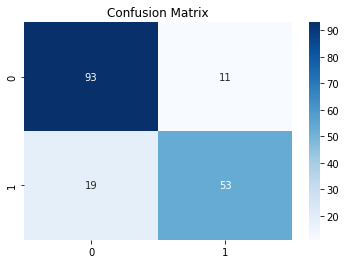

In [174]:
cf_matrix_neg = confusion_matrix(y_test,y_pred_neg)
con = sns.heatmap(cf_matrix_neg, annot=True, cmap='Blues')
con.set_title('Confusion Matrix');
plt.show()

In [175]:
print(classification_report(y_test,y_pred_neg))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       104
           1       0.83      0.74      0.78        72

    accuracy                           0.83       176
   macro avg       0.83      0.82      0.82       176
weighted avg       0.83      0.83      0.83       176



In [71]:
hyp_norm=Hyperparameter(X_train_scale,X_test_scale,y_train,y_test)

In [72]:
Dataframe_norm=hyp_norm.run()
Dataframe_norm

[I 2022-08-24 21:41:55,841] A new study created in memory with name: no-name-315b6b85-cc14-4739-b064-30d0d89e8643
[I 2022-08-24 21:41:55,843] A new study created in memory with name: no-name-acb9a204-dc86-4de3-a5ef-a63687dc34f6
[I 2022-08-24 21:41:55,844] A new study created in memory with name: no-name-0d06ef56-0d84-435d-b808-ec3c32a97af7
[I 2022-08-24 21:41:57,499] Trial 0 finished with value: 0.5909090909090909 and parameters: {'max_depth': 82, 'n_estimators': 876, 'min_samples_leaf': 851, 'criterion': 'entropy', 'min_samples_split': 100, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5909090909090909.
[I 2022-08-24 21:41:58,737] Trial 1 finished with value: 0.5909090909090909 and parameters: {'max_depth': 93, 'n_estimators': 658, 'min_samples_leaf': 334, 'criterion': 'entropy', 'min_samples_split': 253, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 0 with value: 0.5909090909090909.
[I 2022-08-24 21:41:59,470

[I 2022-08-24 21:42:20,948] Trial 25 finished with value: 0.5909090909090909 and parameters: {'max_depth': 381, 'n_estimators': 736, 'min_samples_leaf': 970, 'criterion': 'gini', 'min_samples_split': 165, 'class_weight': 'balanced', 'max_features': None}. Best is trial 2 with value: 0.7840909090909091.
[I 2022-08-24 21:42:22,721] Trial 26 finished with value: 0.5909090909090909 and parameters: {'max_depth': 474, 'n_estimators': 937, 'min_samples_leaf': 458, 'criterion': 'gini', 'min_samples_split': 389, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 2 with value: 0.7840909090909091.
[I 2022-08-24 21:42:23,220] Trial 27 finished with value: 0.5909090909090909 and parameters: {'max_depth': 162, 'n_estimators': 250, 'min_samples_leaf': 929, 'criterion': 'entropy', 'min_samples_split': 136, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 2 with value: 0.7840909090909091.
[I 2022-08-24 21:42:24,518] Trial 28 finished with value: 0.5

[I 2022-08-24 21:42:45,764] Trial 51 finished with value: 0.5909090909090909 and parameters: {'max_depth': 427, 'n_estimators': 327, 'min_samples_leaf': 354, 'criterion': 'gini', 'min_samples_split': 407, 'class_weight': 'balanced_subsample', 'max_features': 'log2'}. Best is trial 46 with value: 0.8238636363636364.
[I 2022-08-24 21:42:46,999] Trial 52 finished with value: 0.5909090909090909 and parameters: {'max_depth': 50, 'n_estimators': 646, 'min_samples_leaf': 926, 'criterion': 'gini', 'min_samples_split': 441, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 46 with value: 0.8238636363636364.
[I 2022-08-24 21:42:48,874] Trial 53 finished with value: 0.7727272727272727 and parameters: {'max_depth': 396, 'n_estimators': 963, 'min_samples_leaf': 120, 'criterion': 'entropy', 'min_samples_split': 439, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 46 with value: 0.8238636363636364.
[I 2022-08-24 21:42:50,198] Trial 54 finished w

[I 2022-08-24 21:43:08,656] Trial 77 finished with value: 0.8011363636363636 and parameters: {'max_depth': 39, 'n_estimators': 628, 'min_samples_leaf': 5, 'criterion': 'entropy', 'min_samples_split': 82, 'class_weight': 'balanced', 'max_features': 'log2'}. Best is trial 46 with value: 0.8238636363636364.
[I 2022-08-24 21:43:09,577] Trial 78 finished with value: 0.7840909090909091 and parameters: {'max_depth': 368, 'n_estimators': 622, 'min_samples_leaf': 27, 'criterion': 'entropy', 'min_samples_split': 408, 'class_weight': 'balanced', 'max_features': 'log2'}. Best is trial 46 with value: 0.8238636363636364.
[I 2022-08-24 21:43:11,203] Trial 79 finished with value: 0.5909090909090909 and parameters: {'max_depth': 431, 'n_estimators': 858, 'min_samples_leaf': 689, 'criterion': 'entropy', 'min_samples_split': 75, 'class_weight': 'balanced_subsample', 'max_features': 'sqrt'}. Best is trial 46 with value: 0.8238636363636364.
[I 2022-08-24 21:43:11,398] Trial 80 finished with value: 0.590909

[W 2022-08-24 21:43:25,403] The parameter 'class_weight' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:43:25,404] The parameter 'max_features' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:43:26,501] Trial 1 finished with value: 0.5909090909090909 and parameters: {'max_depth': 344, 'n_estima

[W 2022-08-24 21:43:30,488] The parameter 'class_weight' in trial#6 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:43:30,489] The parameter 'max_features' in trial#6 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:43:31,654] Trial 6 finished with value: 0.5909090909090909 and parameters: {'max_depth': 349, 'n_estima

[W 2022-08-24 21:43:36,363] The parameter 'class_weight' in trial#11 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:43:36,364] The parameter 'max_features' in trial#11 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:43:37,503] Trial 11 finished with value: 0.5909090909090909 and parameters: {'max_depth': 354, 'n_est

[W 2022-08-24 21:43:41,075] The parameter 'class_weight' in trial#16 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:43:41,076] The parameter 'max_features' in trial#16 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:43:42,230] Trial 16 finished with value: 0.5909090909090909 and parameters: {'max_depth': 249, 'n_est

[W 2022-08-24 21:43:46,371] The parameter 'class_weight' in trial#21 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:43:46,372] The parameter 'max_features' in trial#21 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:43:47,278] Trial 21 finished with value: 0.5909090909090909 and parameters: {'max_depth': 377, 'n_est

[W 2022-08-24 21:43:51,629] The parameter 'class_weight' in trial#26 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:43:51,630] The parameter 'max_features' in trial#26 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:43:52,402] Trial 26 finished with value: 0.5909090909090909 and parameters: {'max_depth': 413, 'n_est

[W 2022-08-24 21:43:56,841] The parameter 'class_weight' in trial#31 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:43:56,842] The parameter 'max_features' in trial#31 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:43:57,927] Trial 31 finished with value: 0.5909090909090909 and parameters: {'max_depth': 484, 'n_est

[W 2022-08-24 21:44:01,528] The parameter 'class_weight' in trial#36 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:44:01,529] The parameter 'max_features' in trial#36 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:44:02,674] Trial 36 finished with value: 0.5909090909090909 and parameters: {'max_depth': 441, 'n_est

[W 2022-08-24 21:44:06,432] The parameter 'class_weight' in trial#41 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:44:06,432] The parameter 'max_features' in trial#41 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:44:07,641] Trial 41 finished with value: 0.5909090909090909 and parameters: {'max_depth': 337, 'n_est

[W 2022-08-24 21:44:11,408] The parameter 'class_weight' in trial#46 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:44:11,409] The parameter 'max_features' in trial#46 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:44:12,652] Trial 46 finished with value: 0.5909090909090909 and parameters: {'max_depth': 370, 'n_est

[W 2022-08-24 21:44:16,746] The parameter 'class_weight' in trial#51 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:44:16,747] The parameter 'max_features' in trial#51 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:44:17,574] Trial 51 finished with value: 0.5909090909090909 and parameters: {'max_depth': 289, 'n_est

[W 2022-08-24 21:44:21,255] The parameter 'class_weight' in trial#56 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:44:21,255] The parameter 'max_features' in trial#56 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:44:22,109] Trial 56 finished with value: 0.5909090909090909 and parameters: {'max_depth': 322, 'n_est

[W 2022-08-24 21:44:26,029] The parameter 'class_weight' in trial#61 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:44:26,030] The parameter 'max_features' in trial#61 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:44:27,027] Trial 61 finished with value: 0.5909090909090909 and parameters: {'max_depth': 224, 'n_est

[W 2022-08-24 21:44:31,015] The parameter 'class_weight' in trial#66 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:44:31,015] The parameter 'max_features' in trial#66 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:44:31,932] Trial 66 finished with value: 0.5909090909090909 and parameters: {'max_depth': 353, 'n_est

[W 2022-08-24 21:44:35,308] The parameter 'class_weight' in trial#71 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:44:35,309] The parameter 'max_features' in trial#71 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:44:36,322] Trial 71 finished with value: 0.5909090909090909 and parameters: {'max_depth': 407, 'n_est

[W 2022-08-24 21:44:40,054] The parameter 'class_weight' in trial#76 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:44:40,055] The parameter 'max_features' in trial#76 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:44:41,228] Trial 76 finished with value: 0.5909090909090909 and parameters: {'max_depth': 347, 'n_est

[W 2022-08-24 21:44:44,654] The parameter 'class_weight' in trial#81 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:44:44,654] The parameter 'max_features' in trial#81 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:44:45,803] Trial 81 finished with value: 0.5909090909090909 and parameters: {'max_depth': 441, 'n_est

[W 2022-08-24 21:44:49,770] The parameter 'class_weight' in trial#86 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:44:49,770] The parameter 'max_features' in trial#86 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:44:50,903] Trial 86 finished with value: 0.5909090909090909 and parameters: {'max_depth': 434, 'n_est

[W 2022-08-24 21:44:55,013] The parameter 'class_weight' in trial#91 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:44:55,014] The parameter 'max_features' in trial#91 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:44:55,811] Trial 91 finished with value: 0.5909090909090909 and parameters: {'max_depth': 377, 'n_est

[W 2022-08-24 21:44:59,866] The parameter 'class_weight' in trial#96 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2022-08-24 21:44:59,866] The parameter 'max_features' in trial#96 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-08-24 21:45:01,058] Trial 96 finished with value: 0.5909090909090909 and parameters: {'max_depth': 440, 'n_est

[I 2022-08-24 21:45:11,435] Trial 6 finished with value: 0.5909090909090909 and parameters: {'max_depth': 51, 'n_estimators': 723, 'min_samples_leaf': 275, 'criterion': 'gini', 'min_samples_split': 398, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 1 with value: 0.7840909090909091.
[I 2022-08-24 21:45:13,104] Trial 7 finished with value: 0.5909090909090909 and parameters: {'max_depth': 172, 'n_estimators': 898, 'min_samples_leaf': 273, 'criterion': 'entropy', 'min_samples_split': 6, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 1 with value: 0.7840909090909091.
[I 2022-08-24 21:45:13,986] Trial 8 finished with value: 0.5909090909090909 and parameters: {'max_depth': 259, 'n_estimators': 611, 'min_samples_leaf': 544, 'criterion': 'entropy', 'min_samples_split': 356, 'class_weight': 'balanced', 'max_features': None}. Best is trial 1 with value: 0.7840909090909091.
[I 2022-08-24 21:45:14,214] Trial 9 finished with value: 0.590909090

[I 2022-08-24 21:45:47,488] Trial 32 finished with value: 0.7784090909090909 and parameters: {'max_depth': 34, 'n_estimators': 565, 'min_samples_leaf': 123, 'criterion': 'gini', 'min_samples_split': 212, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 10 with value: 0.8068181818181818.
[I 2022-08-24 21:45:49,507] Trial 33 finished with value: 0.7784090909090909 and parameters: {'max_depth': 113, 'n_estimators': 871, 'min_samples_leaf': 52, 'criterion': 'entropy', 'min_samples_split': 33, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 10 with value: 0.8068181818181818.
[I 2022-08-24 21:45:50,513] Trial 34 finished with value: 0.6193181818181818 and parameters: {'max_depth': 29, 'n_estimators': 493, 'min_samples_leaf': 233, 'criterion': 'entropy', 'min_samples_split': 93, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 10 with value: 0.8068181818181818.
[I 2022-08-24 21:45:51,283] Trial 35 finished with val

[I 2022-08-24 21:46:20,076] Trial 58 finished with value: 0.5909090909090909 and parameters: {'max_depth': 7, 'n_estimators': 579, 'min_samples_leaf': 284, 'criterion': 'gini', 'min_samples_split': 137, 'class_weight': 'balanced_subsample', 'max_features': None}. Best is trial 10 with value: 0.8068181818181818.
[I 2022-08-24 21:46:21,590] Trial 59 finished with value: 0.7954545454545454 and parameters: {'max_depth': 49, 'n_estimators': 837, 'min_samples_leaf': 34, 'criterion': 'gini', 'min_samples_split': 106, 'class_weight': 'balanced', 'max_features': None}. Best is trial 10 with value: 0.8068181818181818.
[I 2022-08-24 21:46:22,682] Trial 60 finished with value: 0.4090909090909091 and parameters: {'max_depth': 50, 'n_estimators': 758, 'min_samples_leaf': 554, 'criterion': 'gini', 'min_samples_split': 103, 'class_weight': 'balanced', 'max_features': None}. Best is trial 10 with value: 0.8068181818181818.
[I 2022-08-24 21:46:24,221] Trial 61 finished with value: 0.7784090909090909 and

[I 2022-08-24 21:46:58,944] Trial 84 finished with value: 0.8011363636363636 and parameters: {'max_depth': 151, 'n_estimators': 863, 'min_samples_leaf': 9, 'criterion': 'gini', 'min_samples_split': 83, 'class_weight': 'balanced', 'max_features': None}. Best is trial 81 with value: 0.8352272727272727.
[I 2022-08-24 21:47:00,795] Trial 85 finished with value: 0.8011363636363636 and parameters: {'max_depth': 133, 'n_estimators': 917, 'min_samples_leaf': 8, 'criterion': 'gini', 'min_samples_split': 83, 'class_weight': 'balanced', 'max_features': None}. Best is trial 81 with value: 0.8352272727272727.
[I 2022-08-24 21:47:02,956] Trial 86 finished with value: 0.8181818181818182 and parameters: {'max_depth': 146, 'n_estimators': 913, 'min_samples_leaf': 2, 'criterion': 'gini', 'min_samples_split': 3, 'class_weight': 'balanced', 'max_features': None}. Best is trial 81 with value: 0.8352272727272727.
[I 2022-08-24 21:47:04,562] Trial 87 finished with value: 0.7784090909090909 and parameters: {'

,Value
Halving_random_best_params,"{'n_estimators': 400, 'min_samples_split': 30,..."
Halving_random_best_score,0.8125
random_study_best_params,"{'max_depth': 470, 'n_estimators': 427, 'min_s..."
random_study_best_value,0.823864
cmaes_study_best_params,"{'max_depth': 50, 'n_estimators': 868, 'min_sa..."
cmaes_study_best_value,0.590909
tpe_study_best_params,"{'max_depth': 170, 'n_estimators': 955, 'min_s..."
tpe_study_best_value,0.846591
Halving_grid_best_params,"{'class_weight': 'balanced_subsample', 'criter..."
Halving_Grid_best_score,0.801136


In [102]:
Feature_values_normal=Dataframe_norm["Value"].tolist()
Feature_values_normal

[{'n_estimators': 400,
  'min_samples_split': 30,
  'min_samples_leaf': 2,
  'max_features': 'log2',
  'max_depth': 15,
  'criterion': 'gini',
  'class_weight': 'balanced'},
 0.8125,
 {'max_depth': 470,
  'n_estimators': 427,
  'min_samples_leaf': 4,
  'criterion': 'gini',
  'min_samples_split': 6,
  'class_weight': 'balanced',
  'max_features': 'sqrt'},
 0.8238636363636364,
 {'max_depth': 50,
  'n_estimators': 868,
  'min_samples_leaf': 427,
  'criterion': 'entropy',
  'min_samples_split': 477,
  'class_weight': 'balanced_subsample',
  'max_features': None},
 0.5909090909090909,
 {'max_depth': 170,
  'n_estimators': 955,
  'min_samples_leaf': 4,
  'criterion': 'gini',
  'min_samples_split': 2,
  'class_weight': 'balanced',
  'max_features': None},
 0.8465909090909091,
 {'class_weight': 'balanced_subsample',
  'criterion': 'gini',
  'max_depth': 10,
  'max_features': 'sqrt',
  'min_samples_leaf': 5,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.8011363636363636]

In [176]:
model_normal=RandomForestClassifier(n_estimators=955,
  min_samples_split=2,
  min_samples_leaf=4,
  max_features=None,
  max_depth=170,
  criterion='gini',
  class_weight='balanced')

In [177]:
model_normal.fit(X_train_scale,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=170,
                       max_features=None, min_samples_leaf=4, n_estimators=955)

In [178]:
y_pred_normal=model_normal.predict(X_test_scale)

In [179]:
model_normal.score(X_test_scale,y_test)

0.8352272727272727

In [180]:
model_normal.score(X_train_scale,y_train)

0.9114285714285715

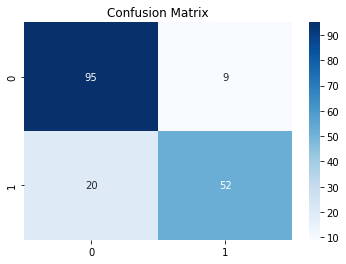

In [182]:
cf_matrix_normal = confusion_matrix(y_test,y_pred_normal)
con = sns.heatmap(cf_matrix_normal, annot=True, cmap='Blues')
con.set_title('Confusion Matrix');
plt.show()

In [183]:
print(classification_report(y_test,y_pred_normal))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       104
           1       0.85      0.72      0.78        72

    accuracy                           0.84       176
   macro avg       0.84      0.82      0.82       176
weighted avg       0.84      0.84      0.83       176

